In [ ]:
!pip install --upgrade category_encoders

# Import Libraries & Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.utils import shuffle
from math import sqrt
import numpy as np
from numpy import ceil
import re
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Exploration "**EDA**"


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SaraElsaggan/nile_project/main/ObesityDataSet_raw_and_data_sinthetic.csv')
df1 = pd.read_csv("https://raw.githubusercontent.com/MohamedMandour10/NU-Competition/main/Dataset.csv")


## First dataframe about **Obesity**

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Second dataframe about **Health Conditions**

In [ ]:
df1.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


## Statistics of Data

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df1.describe()

,Unnamed: 0,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,11664.753123,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075,8.253496,19.332650
std,6814.683196,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427,0.754767,9.746498
min,1.000000,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900,7.000000,0.000000
25%,5959.750000,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700,8.000000,16.000000
50%,10695.500000,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800,8.000000,20.000000
75%,17455.250000,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750,9.000000,28.000000
max,23998.000000,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500,9.000000,31.000000


## Data Preprocessing

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
name_mapping = {"Female": 'F', "Male": "M"}
df["Gender"] = df["Gender"].map(name_mapping)
df['Age'] = df['Age'].astype(int)

In [ ]:
df['BMI'] = df['Weight']/(df['Height']**2)

In [ ]:
cat_features = df.select_dtypes(include=['object'])
num_features = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
for index, row in df.iterrows():
    if row['Gender'] == 'M':
        bmr = 66.47 + (13.75 * row['Weight']) + (5.003 * row['Height'] * 100) - (6.755 * row['Age'])
    else:
        bmr = 655.1 + (9.563 * row['Weight']) + (1.85 * row['Height'] * 100) - (4.676 * row['Age'])
    df.at[index, 'BMR'] = bmr

In [ ]:
df1.rename(columns={'age':'Age','gender':'Gender'},inplace=True)

## Merge the two **Dataframes**

In [ ]:
merged_df = df.merge(df1[['Age','Gender','activity_level']],on=["Age",'Gender'])
merged_df.drop_duplicates(inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6892 entries, 0 to 231577
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          6892 non-null   object 
 1   Age                             6892 non-null   int64  
 2   Height                          6892 non-null   float64
 3   Weight                          6892 non-null   float64
 4   family_history_with_overweight  6892 non-null   object 
 5   FAVC                            6892 non-null   object 
 6   FCVC                            6892 non-null   float64
 7   NCP                             6892 non-null   float64
 8   CAEC                            6892 non-null   object 
 9   SMOKE                           6892 non-null   object 
 10  CH2O                            6892 non-null   float64
 11  SCC                             6892 non-null   object 
 12  FAF                             

# Transform Categorical data into Numerical data

In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

merged_df['Gender_cat'] = lbl.fit_transform(merged_df['Gender'].astype(str))
merged_df['FHWO_cat'] = lbl.fit_transform(merged_df['family_history_with_overweight'].astype(str))
merged_df['FAVC_cat'] = lbl.fit_transform(merged_df['FAVC'].astype(str))
merged_df['CAEC_cat'] = lbl.fit_transform(merged_df['CAEC'].astype(str))
merged_df['SMOKE_cat'] = lbl.fit_transform(merged_df['SMOKE'].astype(str))
merged_df['SCC_cat'] = lbl.fit_transform(merged_df['SCC'].astype(str))
merged_df['CALC_cat'] = lbl.fit_transform(merged_df['CALC'].astype(str))
merged_df['MTRANS_cat'] = lbl.fit_transform(merged_df['MTRANS'].astype(str))
merged_df['NObeyesdad_cat'] = lbl.fit_transform(merged_df['NObeyesdad'].astype(str))

In [ ]:
merged_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'BMR', 'activity_level',
       'Gender_cat', 'FHWO_cat', 'FAVC_cat', 'CAEC_cat', 'SMOKE_cat',
       'SCC_cat', 'CALC_cat', 'MTRANS_cat', 'NObeyesdad_cat'],
      dtype='object')

## Pearson's Correlation coefficient

<ipython-input-18-72911b4afbf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_df.corr(method = 'pearson')


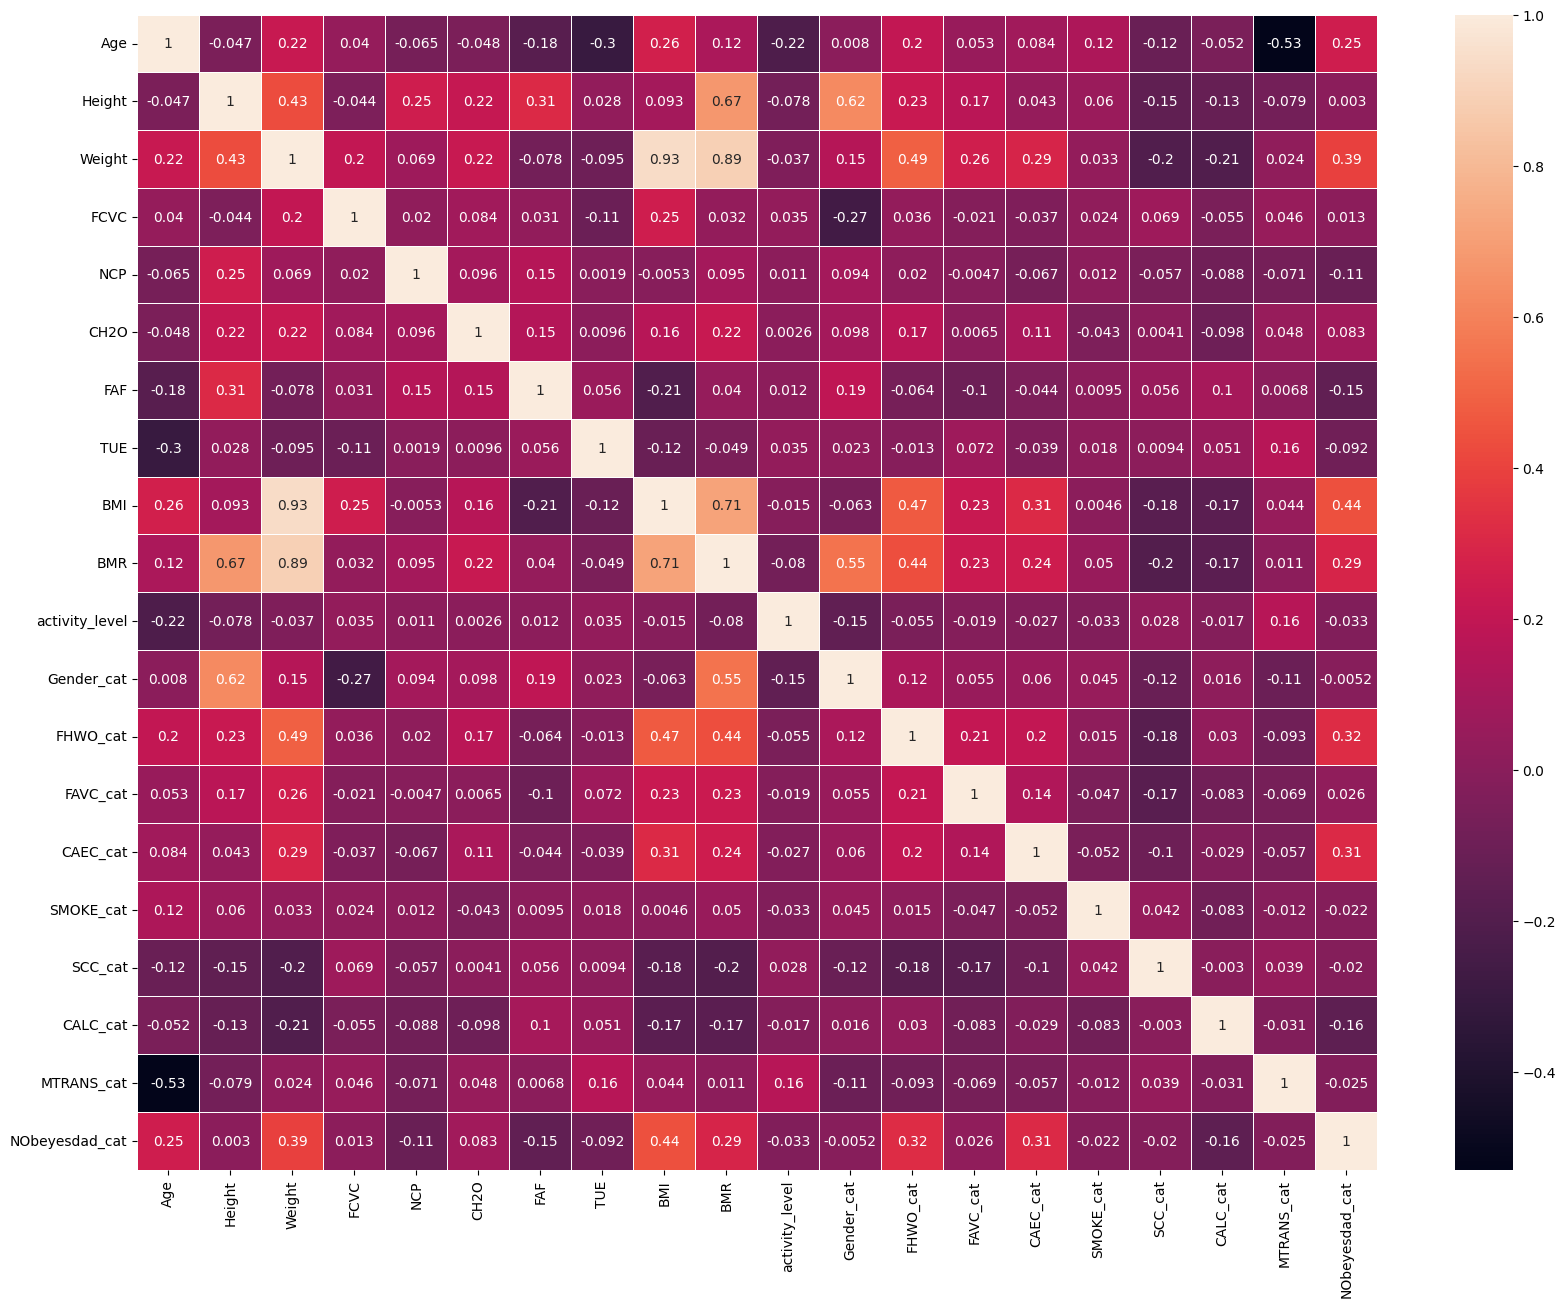

In [ ]:
# correlation between features using pearson's correlation coefficient
cor = merged_df.corr(method = 'pearson')
plt.figure(figsize = (20,15))
sns.heatmap(cor, annot=True, linewidths=.5)
plt.savefig('correlation.png', bbox_inches='tight', pad_inches=0.0, transparent=True)

## Distribution of Data

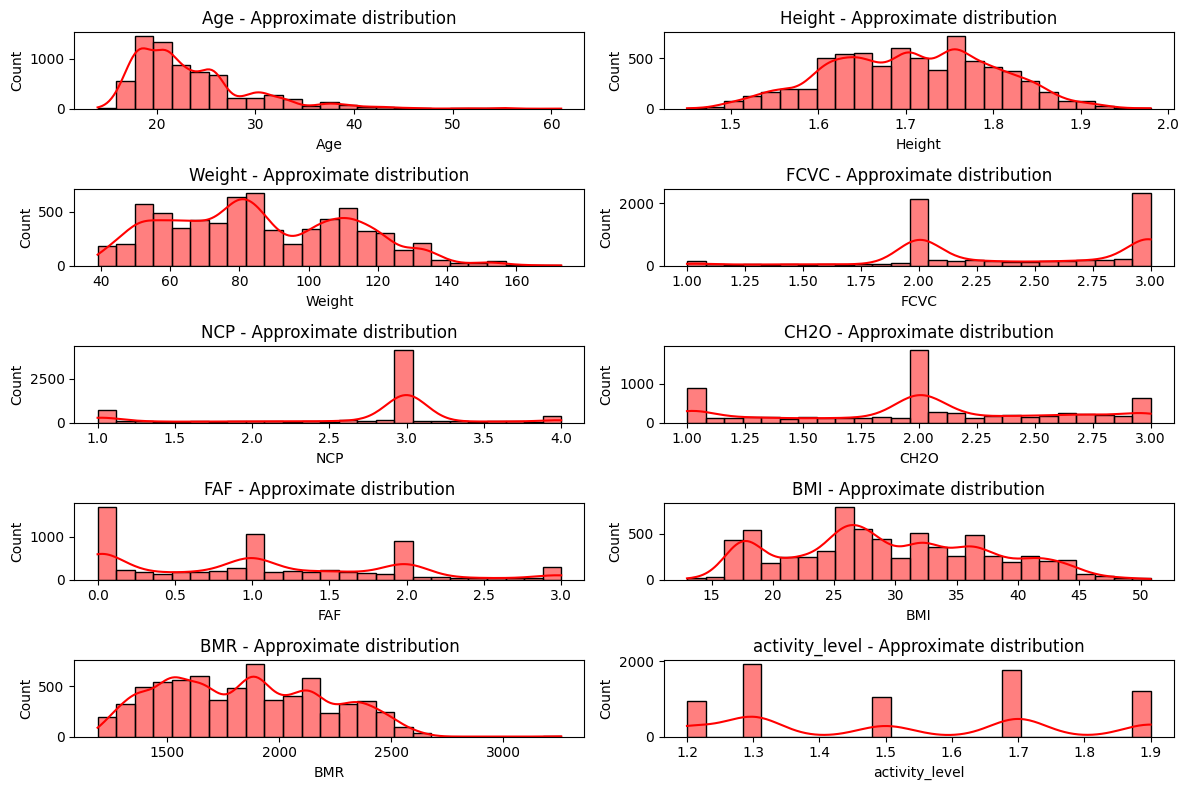

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = ["Age","Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "BMI", "BMR", "activity_level"]

# Calculate the number of rows and columns for the subplot grid
n_rows = len(features) // 2
n_cols = len(features) // n_rows

# Create a single subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Flatten the axs array to simplify indexing in the loop
axs = axs.flatten()

# Iterate over the features and plot histograms
for i, feature in enumerate(features):
    sns.histplot(merged_df, x=feature, kde=True, ax=axs[i], bins=25, color='r')
    axs[i].set_title(f"{feature} - Approximate distribution")

# Remove any unused subplots
if len(features) < len(axs):
    for j in range(len(features), len(axs)):
        axs[j].remove()

# Adjust spacing between subplots
fig.tight_layout()
plt.savefig('Distribtion of data', transparent=True)  # Save the figure as PNG

# Display the plot
plt.show()


## Box-Plot of data before removing **Outliers**

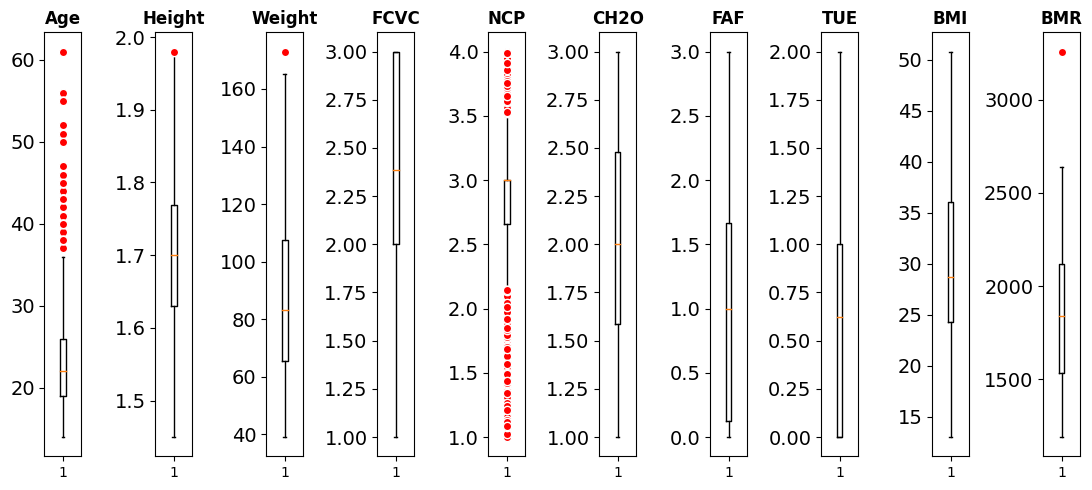

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

numeric_df = df.select_dtypes(include=["int", "float"])
num_cols = numeric_df.columns

fig, axs = plt.subplots(1, len(num_cols), figsize=(11, 5))

for i, (col, ax) in enumerate(zip(num_cols, axs)):
    ax.boxplot(numeric_df[col], flierprops=red_circle)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

# Save the figure with full scale
plt.savefig('outliers.png', dpi=fig.dpi, transparent=True)
plt.show()


# مش عارفة نشيل الاوتليرز ولا لا؟

## Counts of **Catagorical data**

In [ ]:
for feature in cat_features:
  print(cat_features[feature].value_counts())
  print('__________')


M    1068
F    1043
Name: Gender, dtype: int64
__________
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
__________
yes    1866
no      245
Name: FAVC, dtype: int64
__________
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
__________
no     2067
yes      44
Name: SMOKE, dtype: int64
__________
no     2015
yes      96
Name: SCC, dtype: int64
__________
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
__________
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
__________
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
__________


# Data Cleaning
* ### removing outliers using IQR method
* ### removing duplicate values
* ### removing Nan values

In [ ]:
numeric_columns = merged_df.select_dtypes(include='number').columns

# Loop through each numeric column
for label in numeric_columns:
    # Sort the column values
    sorted_col = merged_df[label].sort_values()

    # Calculate the quartiles and IQR
    Q1 = sorted_col.quantile(0.25)
    Q3 = sorted_col.quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers outside the bounds in-place
    merged_df[label] = merged_df[label][(merged_df[label] >= lower_bound) & (merged_df[label] <= upper_bound)]

# Remove duplicates and NaN values
merged_df.dropna(inplace=True)
merged_df.drop_duplicates(inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2625 entries, 370 to 228132
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2625 non-null   object 
 1   Age                             2625 non-null   float64
 2   Height                          2625 non-null   float64
 3   Weight                          2625 non-null   float64
 4   family_history_with_overweight  2625 non-null   object 
 5   FAVC                            2625 non-null   object 
 6   FCVC                            2625 non-null   float64
 7   NCP                             2625 non-null   float64
 8   CAEC                            2625 non-null   object 
 9   SMOKE                           2625 non-null   object 
 10  CH2O                            2625 non-null   float64
 11  SCC                             2625 non-null   object 
 12  FAF                           

# Calculate Calories to maintain

In [ ]:
for index, row in merged_df.iterrows():
    calories = row['BMR'] * row['activity_level']
    merged_df.at[index, 'calories_to_maintain_weight'] = calories

In [ ]:
merged_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'BMR', 'activity_level',
       'Gender_cat', 'FHWO_cat', 'FAVC_cat', 'CAEC_cat', 'SMOKE_cat',
       'SCC_cat', 'CALC_cat', 'MTRANS_cat', 'NObeyesdad_cat',
       'calories_to_maintain_weight'],
      dtype='object')

## Rounding Decimal Values

In [ ]:
df_prep = merged_df.copy()
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'BMR', 'activity_level',
       'Gender_cat', 'FHWO_cat', 'FAVC_cat', 'CAEC_cat', 'SMOKE_cat',
       'SCC_cat', 'CALC_cat', 'MTRANS_cat', 'NObeyesdad_cat',
       'calories_to_maintain_weight'],
      dtype='object')

In [ ]:
df_prep['FCVC']=df_prep['FCVC'].round().astype(int)

df_prep['NCP']=df_prep['NCP'].round().astype(int)

df_prep['CH2O']=df_prep['CH2O'].round().astype(int)

df_prep['FAF']=df_prep['FAF'].round().astype(int)

df_prep['TUE']=df_prep['TUE'].round().astype(int)

## Splitting data into Features and Target

In [ ]:
# Separate features (X) and target variable (y)
X = df_prep.drop(["NObeyesdad", "Weight", "Height", 'Gender', 'family_history_with_overweight', "FAVC",
       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS',  'activity_level'], axis=1)  # Features
y = pd.DataFrame(df_prep["NObeyesdad"]) # Target

In [ ]:
X

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,BMR,Gender_cat,FHWO_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat,NObeyesdad_cat,calories_to_maintain_weight
370,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,6,3272.176200
371,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,6,2238.857400
379,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,6,2927.736600
444,21.0,2,3,2,1,0,26.892323,1583.079000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,5,3007.850100
445,21.0,2,3,2,1,0,26.892323,1583.079000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,5,2058.002700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227870,28.0,3,3,3,1,1,36.571307,2447.878522,1,1.0,1.0,2.0,0.0,0.0,2.0,3.0,3,3182.242078
228128,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3,3133.864974
228129,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3,2507.091979
228131,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3,3551.713637


In [ ]:
y

,NObeyesdad
370,Overweight_Level_II
371,Overweight_Level_II
379,Overweight_Level_II
444,Overweight_Level_I
445,Overweight_Level_I
...,...
227870,Obesity_Type_II
228128,Obesity_Type_II
228129,Obesity_Type_II
228131,Obesity_Type_II


## One Hot Encoder of Target **Y**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
print(ohe.categories_)

y_hot = ohe.transform(y)
print(y_hot)

[array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Importing Neural Network Model

In [ ]:
import torch
import torch.nn as nn

class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(18, 15)
        self.act = nn.ReLU()
        self.output = nn.Linear(15, 7)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

model = Multiclass()

## Loss Function & Optimizer

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import torch
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y_hot= torch.tensor(y_hot, dtype=torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.2, random_state=41)

# Optimization Loop & processes

In [ ]:
import copy
import tqdm
import numpy as np

n_epochs = 600
batch_size = 50
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]

            # Convert one-hot encoded y_batch to class indices
            y_batch_indices = torch.argmax(y_batch, dim=1)

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch_indices)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)

    # Convert one-hot encoded y_test to class indices
    y_test_indices = torch.argmax(y_test, dim=1)

    ce = loss_fn(y_pred, y_test_indices)
    acc = (torch.argmax(y_pred, 1) == y_test_indices).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce}, Accuracy={acc}")

model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 42/42 [00:00<00:00, 65.64batch/s, acc=0.2, loss=30.5]


Epoch 0 validation: Cross-entropy=30.800554275512695, Accuracy=0.2571428716182709


Epoch 1: 100%|██████████| 42/42 [00:00<00:00, 108.13batch/s, acc=0.22, loss=9.8]


Epoch 1 validation: Cross-entropy=9.833342552185059, Accuracy=0.19238094985485077


Epoch 2: 100%|██████████| 42/42 [00:00<00:00, 103.03batch/s, acc=0.2, loss=4.32]


Epoch 2 validation: Cross-entropy=3.8416695594787598, Accuracy=0.20952381193637848


Epoch 3: 100%|██████████| 42/42 [00:00<00:00, 54.83batch/s, acc=0.18, loss=3.4]


Epoch 3 validation: Cross-entropy=3.076143503189087, Accuracy=0.20952381193637848


Epoch 4: 100%|██████████| 42/42 [00:00<00:00, 74.07batch/s, acc=0.28, loss=2.87]


Epoch 4 validation: Cross-entropy=2.531064987182617, Accuracy=0.3085714280605316


Epoch 5: 100%|██████████| 42/42 [00:00<00:00, 56.95batch/s, acc=0.28, loss=2.61]


Epoch 5 validation: Cross-entropy=2.3183953762054443, Accuracy=0.3257142901420593


Epoch 6: 100%|██████████| 42/42 [00:00<00:00, 62.45batch/s, acc=0.32, loss=2.56]


Epoch 6 validation: Cross-entropy=2.228179693222046, Accuracy=0.3199999928474426


Epoch 7: 100%|██████████| 42/42 [00:00<00:00, 52.87batch/s, acc=0.32, loss=2.47]


Epoch 7 validation: Cross-entropy=2.087999105453491, Accuracy=0.3390476107597351


Epoch 8: 100%|██████████| 42/42 [00:00<00:00, 54.16batch/s, acc=0.32, loss=2.31]


Epoch 8 validation: Cross-entropy=1.9414836168289185, Accuracy=0.31238093972206116


Epoch 9: 100%|██████████| 42/42 [00:00<00:00, 59.69batch/s, acc=0.32, loss=2.2]


Epoch 9 validation: Cross-entropy=1.8661293983459473, Accuracy=0.3085714280605316


Epoch 10: 100%|██████████| 42/42 [00:00<00:00, 86.82batch/s, acc=0.32, loss=2.1] 


Epoch 10 validation: Cross-entropy=1.8153753280639648, Accuracy=0.2857142984867096


Epoch 11: 100%|██████████| 42/42 [00:00<00:00, 88.78batch/s, acc=0.32, loss=2.03]


Epoch 11 validation: Cross-entropy=1.7765607833862305, Accuracy=0.28380951285362244


Epoch 12: 100%|██████████| 42/42 [00:00<00:00, 114.04batch/s, acc=0.32, loss=1.98]


Epoch 12 validation: Cross-entropy=1.7381280660629272, Accuracy=0.3085714280605316


Epoch 13: 100%|██████████| 42/42 [00:00<00:00, 103.15batch/s, acc=0.28, loss=1.92]


Epoch 13 validation: Cross-entropy=1.6998928785324097, Accuracy=0.3257142901420593


Epoch 14: 100%|██████████| 42/42 [00:00<00:00, 57.03batch/s, acc=0.26, loss=1.87]


Epoch 14 validation: Cross-entropy=1.661376953125, Accuracy=0.3523809611797333


Epoch 15: 100%|██████████| 42/42 [00:00<00:00, 47.09batch/s, acc=0.3, loss=1.83]


Epoch 15 validation: Cross-entropy=1.6240776777267456, Accuracy=0.3866666555404663


Epoch 16: 100%|██████████| 42/42 [00:00<00:00, 66.87batch/s, acc=0.3, loss=1.79]


Epoch 16 validation: Cross-entropy=1.5885533094406128, Accuracy=0.43047618865966797


Epoch 17: 100%|██████████| 42/42 [00:00<00:00, 69.55batch/s, acc=0.3, loss=1.75]


Epoch 17 validation: Cross-entropy=1.5552634000778198, Accuracy=0.4590476155281067


Epoch 18: 100%|██████████| 42/42 [00:00<00:00, 117.23batch/s, acc=0.32, loss=1.71]


Epoch 18 validation: Cross-entropy=1.5241360664367676, Accuracy=0.46857142448425293


Epoch 19: 100%|██████████| 42/42 [00:00<00:00, 89.38batch/s, acc=0.32, loss=1.68] 


Epoch 19 validation: Cross-entropy=1.4948915243148804, Accuracy=0.47809523344039917


Epoch 20: 100%|██████████| 42/42 [00:00<00:00, 51.88batch/s, acc=0.32, loss=1.65]


Epoch 20 validation: Cross-entropy=1.4672423601150513, Accuracy=0.49714285135269165


Epoch 21: 100%|██████████| 42/42 [00:01<00:00, 39.37batch/s, acc=0.32, loss=1.62]


Epoch 21 validation: Cross-entropy=1.440940260887146, Accuracy=0.5104761719703674


Epoch 22: 100%|██████████| 42/42 [00:00<00:00, 78.68batch/s, acc=0.32, loss=1.6]


Epoch 22 validation: Cross-entropy=1.4158211946487427, Accuracy=0.5142857432365417


Epoch 23: 100%|██████████| 42/42 [00:00<00:00, 73.95batch/s, acc=0.32, loss=1.57]


Epoch 23 validation: Cross-entropy=1.3918647766113281, Accuracy=0.523809552192688


Epoch 24: 100%|██████████| 42/42 [00:00<00:00, 91.06batch/s, acc=0.32, loss=1.55] 


Epoch 24 validation: Cross-entropy=1.3690080642700195, Accuracy=0.5295237898826599


Epoch 25: 100%|██████████| 42/42 [00:00<00:00, 91.17batch/s, acc=0.34, loss=1.52]


Epoch 25 validation: Cross-entropy=1.3472329378128052, Accuracy=0.5390475988388062


Epoch 26: 100%|██████████| 42/42 [00:00<00:00, 57.96batch/s, acc=0.36, loss=1.5]


Epoch 26 validation: Cross-entropy=1.3265243768692017, Accuracy=0.5428571701049805


Epoch 27: 100%|██████████| 42/42 [00:00<00:00, 116.05batch/s, acc=0.36, loss=1.48]


Epoch 27 validation: Cross-entropy=1.306893229484558, Accuracy=0.54666668176651


Epoch 28: 100%|██████████| 42/42 [00:00<00:00, 67.98batch/s, acc=0.36, loss=1.46]


Epoch 28 validation: Cross-entropy=1.2883087396621704, Accuracy=0.561904788017273


Epoch 29: 100%|██████████| 42/42 [00:00<00:00, 70.88batch/s, acc=0.36, loss=1.44] 


Epoch 29 validation: Cross-entropy=1.2707746028900146, Accuracy=0.5638095140457153


Epoch 30: 100%|██████████| 42/42 [00:00<00:00, 92.79batch/s, acc=0.38, loss=1.42]


Epoch 30 validation: Cross-entropy=1.2542707920074463, Accuracy=0.5676190257072449


Epoch 31: 100%|██████████| 42/42 [00:00<00:00, 127.67batch/s, acc=0.4, loss=1.4]


Epoch 31 validation: Cross-entropy=1.2388046979904175, Accuracy=0.5771428346633911


Epoch 32: 100%|██████████| 42/42 [00:00<00:00, 53.14batch/s, acc=0.42, loss=1.38] 


Epoch 32 validation: Cross-entropy=1.2243454456329346, Accuracy=0.5866666436195374


Epoch 33: 100%|██████████| 42/42 [00:00<00:00, 71.95batch/s, acc=0.44, loss=1.37]


Epoch 33 validation: Cross-entropy=1.2108654975891113, Accuracy=0.5866666436195374


Epoch 34: 100%|██████████| 42/42 [00:00<00:00, 80.04batch/s, acc=0.44, loss=1.35]


Epoch 34 validation: Cross-entropy=1.1983282566070557, Accuracy=0.5904762148857117


Epoch 35: 100%|██████████| 42/42 [00:00<00:00, 66.11batch/s, acc=0.44, loss=1.33] 


Epoch 35 validation: Cross-entropy=1.186663031578064, Accuracy=0.5980952382087708


Epoch 36: 100%|██████████| 42/42 [00:00<00:00, 136.19batch/s, acc=0.46, loss=1.32]


Epoch 36 validation: Cross-entropy=1.1758410930633545, Accuracy=0.6000000238418579


Epoch 37: 100%|██████████| 42/42 [00:00<00:00, 213.34batch/s, acc=0.5, loss=1.31]


Epoch 37 validation: Cross-entropy=1.1657980680465698, Accuracy=0.607619047164917


Epoch 38: 100%|██████████| 42/42 [00:00<00:00, 225.37batch/s, acc=0.5, loss=1.29]


Epoch 38 validation: Cross-entropy=1.156431794166565, Accuracy=0.6114285588264465


Epoch 39: 100%|██████████| 42/42 [00:00<00:00, 226.19batch/s, acc=0.54, loss=1.28]


Epoch 39 validation: Cross-entropy=1.1476709842681885, Accuracy=0.6152380704879761


Epoch 40: 100%|██████████| 42/42 [00:00<00:00, 81.91batch/s, acc=0.54, loss=1.27]


Epoch 40 validation: Cross-entropy=1.1394575834274292, Accuracy=0.6152380704879761


Epoch 41: 100%|██████████| 42/42 [00:00<00:00, 188.23batch/s, acc=0.54, loss=1.26]


Epoch 41 validation: Cross-entropy=1.131683588027954, Accuracy=0.6190476417541504


Epoch 42: 100%|██████████| 42/42 [00:00<00:00, 167.13batch/s, acc=0.54, loss=1.25]


Epoch 42 validation: Cross-entropy=1.1242737770080566, Accuracy=0.6285714507102966


Epoch 43: 100%|██████████| 42/42 [00:00<00:00, 237.10batch/s, acc=0.54, loss=1.24]


Epoch 43 validation: Cross-entropy=1.117158055305481, Accuracy=0.6380952596664429


Epoch 44: 100%|██████████| 42/42 [00:00<00:00, 213.74batch/s, acc=0.54, loss=1.23]


Epoch 44 validation: Cross-entropy=1.110236644744873, Accuracy=0.6419047713279724


Epoch 45: 100%|██████████| 42/42 [00:00<00:00, 166.38batch/s, acc=0.56, loss=1.22]


Epoch 45 validation: Cross-entropy=1.1034373044967651, Accuracy=0.645714282989502


Epoch 46: 100%|██████████| 42/42 [00:00<00:00, 232.48batch/s, acc=0.6, loss=1.21]


Epoch 46 validation: Cross-entropy=1.096709966659546, Accuracy=0.6514285802841187


Epoch 47: 100%|██████████| 42/42 [00:00<00:00, 239.20batch/s, acc=0.64, loss=1.2]


Epoch 47 validation: Cross-entropy=1.089995265007019, Accuracy=0.6571428775787354


Epoch 48: 100%|██████████| 42/42 [00:00<00:00, 124.74batch/s, acc=0.64, loss=1.2]


Epoch 48 validation: Cross-entropy=1.0832335948944092, Accuracy=0.6647619009017944


Epoch 49: 100%|██████████| 42/42 [00:00<00:00, 221.18batch/s, acc=0.64, loss=1.19]


Epoch 49 validation: Cross-entropy=1.076402187347412, Accuracy=0.6723809242248535


Epoch 50: 100%|██████████| 42/42 [00:00<00:00, 259.56batch/s, acc=0.66, loss=1.18]


Epoch 50 validation: Cross-entropy=1.0694692134857178, Accuracy=0.6819047331809998


Epoch 51: 100%|██████████| 42/42 [00:00<00:00, 122.41batch/s, acc=0.66, loss=1.17]


Epoch 51 validation: Cross-entropy=1.0624221563339233, Accuracy=0.6857143044471741


Epoch 52: 100%|██████████| 42/42 [00:00<00:00, 216.78batch/s, acc=0.68, loss=1.17]


Epoch 52 validation: Cross-entropy=1.0552620887756348, Accuracy=0.6895238161087036


Epoch 53: 100%|██████████| 42/42 [00:00<00:00, 231.44batch/s, acc=0.68, loss=1.16]


Epoch 53 validation: Cross-entropy=1.0479912757873535, Accuracy=0.6971428394317627


Epoch 54: 100%|██████████| 42/42 [00:00<00:00, 112.18batch/s, acc=0.68, loss=1.15]


Epoch 54 validation: Cross-entropy=1.0406086444854736, Accuracy=0.6990476250648499


Epoch 55: 100%|██████████| 42/42 [00:00<00:00, 193.75batch/s, acc=0.68, loss=1.14]


Epoch 55 validation: Cross-entropy=1.0331281423568726, Accuracy=0.6971428394317627


Epoch 56: 100%|██████████| 42/42 [00:00<00:00, 222.21batch/s, acc=0.68, loss=1.14]


Epoch 56 validation: Cross-entropy=1.0255900621414185, Accuracy=0.6971428394317627


Epoch 57: 100%|██████████| 42/42 [00:00<00:00, 144.43batch/s, acc=0.68, loss=1.13]


Epoch 57 validation: Cross-entropy=1.0179961919784546, Accuracy=0.7028571367263794


Epoch 58: 100%|██████████| 42/42 [00:00<00:00, 212.84batch/s, acc=0.68, loss=1.12]


Epoch 58 validation: Cross-entropy=1.0103598833084106, Accuracy=0.7066666483879089


Epoch 59: 100%|██████████| 42/42 [00:00<00:00, 123.42batch/s, acc=0.68, loss=1.12]


Epoch 59 validation: Cross-entropy=1.0027008056640625, Accuracy=0.7047619223594666


Epoch 60: 100%|██████████| 42/42 [00:00<00:00, 203.04batch/s, acc=0.68, loss=1.11]


Epoch 60 validation: Cross-entropy=0.9950159192085266, Accuracy=0.7066666483879089


Epoch 61: 100%|██████████| 42/42 [00:00<00:00, 216.89batch/s, acc=0.68, loss=1.1]


Epoch 61 validation: Cross-entropy=0.9873290061950684, Accuracy=0.7085714340209961


Epoch 62: 100%|██████████| 42/42 [00:00<00:00, 114.68batch/s, acc=0.68, loss=1.09]


Epoch 62 validation: Cross-entropy=0.9796704053878784, Accuracy=0.7104762196540833


Epoch 63: 100%|██████████| 42/42 [00:00<00:00, 191.17batch/s, acc=0.68, loss=1.09]


Epoch 63 validation: Cross-entropy=0.9720083475112915, Accuracy=0.7123809456825256


Epoch 64: 100%|██████████| 42/42 [00:00<00:00, 202.60batch/s, acc=0.68, loss=1.08]


Epoch 64 validation: Cross-entropy=0.9643831253051758, Accuracy=0.7123809456825256


Epoch 71: 100%|██████████| 42/42 [00:00<00:00, 131.90batch/s, acc=0.68, loss=1.03]


Epoch 71 validation: Cross-entropy=0.9119336605072021, Accuracy=0.7200000286102295


Epoch 72: 100%|██████████| 42/42 [00:00<00:00, 229.30batch/s, acc=0.68, loss=1.02]


Epoch 72 validation: Cross-entropy=0.9046047329902649, Accuracy=0.7200000286102295


Epoch 73: 100%|██████████| 42/42 [00:00<00:00, 134.97batch/s, acc=0.68, loss=1.02]


Epoch 73 validation: Cross-entropy=0.897334098815918, Accuracy=0.7200000286102295


Epoch 74: 100%|██████████| 42/42 [00:00<00:00, 207.23batch/s, acc=0.68, loss=1.01]


Epoch 74 validation: Cross-entropy=0.8900960087776184, Accuracy=0.7200000286102295


Epoch 75: 100%|██████████| 42/42 [00:00<00:00, 213.11batch/s, acc=0.68, loss=1]


Epoch 75 validation: Cross-entropy=0.882927417755127, Accuracy=0.7219047546386719


Epoch 82: 100%|██████████| 42/42 [00:00<00:00, 131.79batch/s, acc=0.68, loss=0.958]


Epoch 82 validation: Cross-entropy=0.8342102766036987, Accuracy=0.7257142663002014


Epoch 83: 100%|██████████| 42/42 [00:00<00:00, 201.91batch/s, acc=0.68, loss=0.952]


Epoch 83 validation: Cross-entropy=0.8274723291397095, Accuracy=0.7257142663002014


Epoch 84: 100%|██████████| 42/42 [00:00<00:00, 228.87batch/s, acc=0.68, loss=0.946]


Epoch 84 validation: Cross-entropy=0.8207777142524719, Accuracy=0.7257142663002014


Epoch 85: 100%|██████████| 42/42 [00:00<00:00, 133.78batch/s, acc=0.68, loss=0.94]


Epoch 85 validation: Cross-entropy=0.8141372799873352, Accuracy=0.7257142663002014


Epoch 86: 100%|██████████| 42/42 [00:00<00:00, 233.68batch/s, acc=0.68, loss=0.934]


Epoch 86 validation: Cross-entropy=0.8075476884841919, Accuracy=0.7257142663002014


Epoch 91: 100%|██████████| 42/42 [00:00<00:00, 235.37batch/s, acc=0.68, loss=0.904]


Epoch 91 validation: Cross-entropy=0.7753762006759644, Accuracy=0.7257142663002014


Epoch 92: 100%|██████████| 42/42 [00:00<00:00, 199.28batch/s, acc=0.68, loss=0.898]


Epoch 92 validation: Cross-entropy=0.7690894603729248, Accuracy=0.7257142663002014


Epoch 93: 100%|██████████| 42/42 [00:00<00:00, 141.82batch/s, acc=0.68, loss=0.892]


Epoch 93 validation: Cross-entropy=0.7628422379493713, Accuracy=0.7257142663002014


Epoch 94: 100%|██████████| 42/42 [00:00<00:00, 237.45batch/s, acc=0.68, loss=0.886]


Epoch 94 validation: Cross-entropy=0.7566484212875366, Accuracy=0.7295238375663757


Epoch 95: 100%|██████████| 42/42 [00:00<00:00, 249.50batch/s, acc=0.68, loss=0.881]


Epoch 95 validation: Cross-entropy=0.7504885196685791, Accuracy=0.7295238375663757


Epoch 96: 100%|██████████| 42/42 [00:00<00:00, 131.26batch/s, acc=0.68, loss=0.875]


Epoch 96 validation: Cross-entropy=0.7443840503692627, Accuracy=0.7314285635948181


Epoch 102: 100%|██████████| 42/42 [00:00<00:00, 199.74batch/s, acc=0.72, loss=0.841]


Epoch 102 validation: Cross-entropy=0.7085973024368286, Accuracy=0.7409523725509644


Epoch 103: 100%|██████████| 42/42 [00:00<00:00, 79.36batch/s, acc=0.74, loss=0.835] 


Epoch 103 validation: Cross-entropy=0.7027752995491028, Accuracy=0.7447618842124939


Epoch 104: 100%|██████████| 42/42 [00:00<00:00, 176.57batch/s, acc=0.74, loss=0.829]


Epoch 104 validation: Cross-entropy=0.6969944834709167, Accuracy=0.7447618842124939


Epoch 105: 100%|██████████| 42/42 [00:00<00:00, 141.79batch/s, acc=0.76, loss=0.824]


Epoch 105 validation: Cross-entropy=0.6912443041801453, Accuracy=0.7447618842124939


Epoch 106: 100%|██████████| 42/42 [00:00<00:00, 128.04batch/s, acc=0.76, loss=0.818]


Epoch 106 validation: Cross-entropy=0.6855267882347107, Accuracy=0.7447618842124939


Epoch 107: 100%|██████████| 42/42 [00:00<00:00, 156.20batch/s, acc=0.76, loss=0.812]


Epoch 107 validation: Cross-entropy=0.6798357963562012, Accuracy=0.7447618842124939


Epoch 110: 100%|██████████| 42/42 [00:00<00:00, 144.93batch/s, acc=0.76, loss=0.795]


Epoch 110 validation: Cross-entropy=0.6629953384399414, Accuracy=0.746666669845581


Epoch 111: 100%|██████████| 42/42 [00:00<00:00, 144.60batch/s, acc=0.76, loss=0.79]


Epoch 111 validation: Cross-entropy=0.6574453115463257, Accuracy=0.7485714554786682


Epoch 112: 100%|██████████| 42/42 [00:00<00:00, 146.36batch/s, acc=0.76, loss=0.784]


Epoch 112 validation: Cross-entropy=0.6519256234169006, Accuracy=0.7485714554786682


Epoch 113: 100%|██████████| 42/42 [00:00<00:00, 152.61batch/s, acc=0.76, loss=0.779]


Epoch 113 validation: Cross-entropy=0.646440327167511, Accuracy=0.7485714554786682


Epoch 114: 100%|██████████| 42/42 [00:00<00:00, 161.27batch/s, acc=0.76, loss=0.773]


Epoch 114 validation: Cross-entropy=0.6409720182418823, Accuracy=0.7485714554786682


Epoch 125: 100%|██████████| 42/42 [00:00<00:00, 133.00batch/s, acc=0.76, loss=0.712]


Epoch 125 validation: Cross-entropy=0.5824731588363647, Accuracy=0.7733333110809326


Epoch 126: 100%|██████████| 42/42 [00:00<00:00, 149.50batch/s, acc=0.76, loss=0.707]


Epoch 126 validation: Cross-entropy=0.5772895812988281, Accuracy=0.7752380967140198


Epoch 127: 100%|██████████| 42/42 [00:00<00:00, 146.44batch/s, acc=0.76, loss=0.701]


Epoch 127 validation: Cross-entropy=0.5721200704574585, Accuracy=0.7752380967140198


Epoch 128: 100%|██████████| 42/42 [00:00<00:00, 145.93batch/s, acc=0.76, loss=0.696]


Epoch 128 validation: Cross-entropy=0.5669742226600647, Accuracy=0.7790476083755493


Epoch 129: 100%|██████████| 42/42 [00:00<00:00, 140.43batch/s, acc=0.76, loss=0.69]


Epoch 129 validation: Cross-entropy=0.5618526339530945, Accuracy=0.7828571200370789


Epoch 130: 100%|██████████| 42/42 [00:00<00:00, 148.35batch/s, acc=0.76, loss=0.685]


Epoch 130 validation: Cross-entropy=0.5567364692687988, Accuracy=0.784761905670166


Epoch 136: 100%|██████████| 42/42 [00:00<00:00, 106.01batch/s, acc=0.76, loss=0.653]


Epoch 136 validation: Cross-entropy=0.5266022682189941, Accuracy=0.7942857146263123


Epoch 137: 100%|██████████| 42/42 [00:00<00:00, 148.74batch/s, acc=0.76, loss=0.647]


Epoch 137 validation: Cross-entropy=0.5216876864433289, Accuracy=0.7923809289932251


Epoch 138: 100%|██████████| 42/42 [00:00<00:00, 130.94batch/s, acc=0.76, loss=0.642]


Epoch 138 validation: Cross-entropy=0.5168092250823975, Accuracy=0.7961905002593994


Epoch 139: 100%|██████████| 42/42 [00:00<00:00, 144.09batch/s, acc=0.76, loss=0.637]


Epoch 139 validation: Cross-entropy=0.511967122554779, Accuracy=0.7980952262878418


Epoch 140: 100%|██████████| 42/42 [00:00<00:00, 109.29batch/s, acc=0.76, loss=0.632]


Epoch 140 validation: Cross-entropy=0.5071611404418945, Accuracy=0.7980952262878418


Epoch 141: 100%|██████████| 42/42 [00:00<00:00, 170.55batch/s, acc=0.76, loss=0.627]


Epoch 141 validation: Cross-entropy=0.502406120300293, Accuracy=0.800000011920929


Epoch 144: 100%|██████████| 42/42 [00:00<00:00, 131.70batch/s, acc=0.78, loss=0.613]


Epoch 144 validation: Cross-entropy=0.4884742498397827, Accuracy=0.807619035243988


Epoch 145: 100%|██████████| 42/42 [00:00<00:00, 156.61batch/s, acc=0.78, loss=0.609]


Epoch 145 validation: Cross-entropy=0.48395007848739624, Accuracy=0.807619035243988


Epoch 146: 100%|██████████| 42/42 [00:00<00:00, 153.80batch/s, acc=0.78, loss=0.604]


Epoch 146 validation: Cross-entropy=0.4794865846633911, Accuracy=0.807619035243988


Epoch 147: 100%|██████████| 42/42 [00:00<00:00, 130.99batch/s, acc=0.8, loss=0.6]


Epoch 147 validation: Cross-entropy=0.4750886857509613, Accuracy=0.8095238208770752


Epoch 148: 100%|██████████| 42/42 [00:00<00:00, 198.09batch/s, acc=0.8, loss=0.596]


Epoch 148 validation: Cross-entropy=0.4707651138305664, Accuracy=0.8095238208770752


Epoch 149: 100%|██████████| 42/42 [00:00<00:00, 231.08batch/s, acc=0.8, loss=0.592]


Epoch 149 validation: Cross-entropy=0.46651336550712585, Accuracy=0.8095238208770752


Epoch 155: 100%|██████████| 42/42 [00:00<00:00, 198.90batch/s, acc=0.8, loss=0.569]


Epoch 155 validation: Cross-entropy=0.4424649477005005, Accuracy=0.8152381181716919


Epoch 156: 100%|██████████| 42/42 [00:00<00:00, 231.50batch/s, acc=0.8, loss=0.566]


Epoch 156 validation: Cross-entropy=0.43870028853416443, Accuracy=0.8171428442001343


Epoch 157: 100%|██████████| 42/42 [00:00<00:00, 140.85batch/s, acc=0.8, loss=0.563]


Epoch 157 validation: Cross-entropy=0.43499910831451416, Accuracy=0.822857141494751


Epoch 158: 100%|██████████| 42/42 [00:00<00:00, 236.69batch/s, acc=0.8, loss=0.559]


Epoch 158 validation: Cross-entropy=0.43136122822761536, Accuracy=0.8247619271278381


Epoch 159: 100%|██████████| 42/42 [00:00<00:00, 225.23batch/s, acc=0.8, loss=0.556]


Epoch 159 validation: Cross-entropy=0.4277837872505188, Accuracy=0.8247619271278381


Epoch 160: 100%|██████████| 42/42 [00:00<00:00, 124.59batch/s, acc=0.8, loss=0.553]


Epoch 160 validation: Cross-entropy=0.424262672662735, Accuracy=0.8266666531562805


Epoch 168: 100%|██████████| 42/42 [00:00<00:00, 122.15batch/s, acc=0.8, loss=0.531]


Epoch 168 validation: Cross-entropy=0.39804887771606445, Accuracy=0.8342857360839844


Epoch 169: 100%|██████████| 42/42 [00:00<00:00, 240.40batch/s, acc=0.8, loss=0.528]


Epoch 169 validation: Cross-entropy=0.39498844742774963, Accuracy=0.8361904621124268


Epoch 170: 100%|██████████| 42/42 [00:00<00:00, 215.56batch/s, acc=0.8, loss=0.526]


Epoch 170 validation: Cross-entropy=0.3919777274131775, Accuracy=0.8361904621124268


Epoch 171: 100%|██████████| 42/42 [00:00<00:00, 116.79batch/s, acc=0.8, loss=0.524]


Epoch 171 validation: Cross-entropy=0.3890129029750824, Accuracy=0.8399999737739563


Epoch 172: 100%|██████████| 42/42 [00:00<00:00, 211.20batch/s, acc=0.8, loss=0.521]


Epoch 172 validation: Cross-entropy=0.38608917593955994, Accuracy=0.8399999737739563


Epoch 189: 100%|██████████| 42/42 [00:00<00:00, 156.19batch/s, acc=0.82, loss=0.487]


Epoch 189 validation: Cross-entropy=0.34376534819602966, Accuracy=0.8780952095985413


Epoch 190: 100%|██████████| 42/42 [00:00<00:00, 128.11batch/s, acc=0.82, loss=0.485]


Epoch 190 validation: Cross-entropy=0.34173229336738586, Accuracy=0.8780952095985413


Epoch 191: 100%|██████████| 42/42 [00:00<00:00, 157.31batch/s, acc=0.82, loss=0.483]


Epoch 191 validation: Cross-entropy=0.33974820375442505, Accuracy=0.8780952095985413


Epoch 192: 100%|██████████| 42/42 [00:00<00:00, 226.06batch/s, acc=0.82, loss=0.481]


Epoch 192 validation: Cross-entropy=0.3378041684627533, Accuracy=0.8780952095985413


Epoch 193: 100%|██████████| 42/42 [00:00<00:00, 233.90batch/s, acc=0.82, loss=0.479]


Epoch 193 validation: Cross-entropy=0.3359013497829437, Accuracy=0.8799999952316284


Epoch 203: 100%|██████████| 42/42 [00:00<00:00, 234.88batch/s, acc=0.82, loss=0.455]


Epoch 203 validation: Cross-entropy=0.3182899057865143, Accuracy=0.8895238041877747


Epoch 204: 100%|██████████| 42/42 [00:00<00:00, 244.02batch/s, acc=0.82, loss=0.452]


Epoch 204 validation: Cross-entropy=0.3165774643421173, Accuracy=0.8895238041877747


Epoch 205: 100%|██████████| 42/42 [00:00<00:00, 125.70batch/s, acc=0.82, loss=0.449]


Epoch 205 validation: Cross-entropy=0.31486040353775024, Accuracy=0.8933333158493042


Epoch 206: 100%|██████████| 42/42 [00:00<00:00, 247.64batch/s, acc=0.82, loss=0.446]


Epoch 206 validation: Cross-entropy=0.31313636898994446, Accuracy=0.8933333158493042


Epoch 207: 100%|██████████| 42/42 [00:00<00:00, 134.59batch/s, acc=0.82, loss=0.443]


Epoch 207 validation: Cross-entropy=0.3114147484302521, Accuracy=0.8933333158493042


Epoch 208: 100%|██████████| 42/42 [00:00<00:00, 227.16batch/s, acc=0.82, loss=0.44]


Epoch 208 validation: Cross-entropy=0.3096851408481598, Accuracy=0.8933333158493042


Epoch 216: 100%|██████████| 42/42 [00:00<00:00, 194.80batch/s, acc=0.82, loss=0.415]


Epoch 216 validation: Cross-entropy=0.29611489176750183, Accuracy=0.8952381014823914


Epoch 217: 100%|██████████| 42/42 [00:00<00:00, 231.89batch/s, acc=0.82, loss=0.412]


Epoch 217 validation: Cross-entropy=0.29449424147605896, Accuracy=0.8971428275108337


Epoch 218: 100%|██████████| 42/42 [00:00<00:00, 217.52batch/s, acc=0.82, loss=0.409]


Epoch 218 validation: Cross-entropy=0.2928982079029083, Accuracy=0.8971428275108337


Epoch 219: 100%|██████████| 42/42 [00:00<00:00, 141.74batch/s, acc=0.82, loss=0.406]


Epoch 219 validation: Cross-entropy=0.29132917523384094, Accuracy=0.8990476131439209


Epoch 220: 100%|██████████| 42/42 [00:00<00:00, 88.96batch/s, acc=0.82, loss=0.403] 


Epoch 220 validation: Cross-entropy=0.2897910475730896, Accuracy=0.8990476131439209


Epoch 221: 100%|██████████| 42/42 [00:00<00:00, 199.77batch/s, acc=0.82, loss=0.4]


Epoch 221 validation: Cross-entropy=0.2882879674434662, Accuracy=0.8990476131439209


Epoch 226: 100%|██████████| 42/42 [00:00<00:00, 142.24batch/s, acc=0.82, loss=0.386]


Epoch 226 validation: Cross-entropy=0.28128302097320557, Accuracy=0.9066666960716248


Epoch 227: 100%|██████████| 42/42 [00:00<00:00, 157.61batch/s, acc=0.82, loss=0.384]


Epoch 227 validation: Cross-entropy=0.27999356389045715, Accuracy=0.9066666960716248


Epoch 228: 100%|██████████| 42/42 [00:00<00:00, 150.41batch/s, acc=0.82, loss=0.381]


Epoch 228 validation: Cross-entropy=0.278739869594574, Accuracy=0.9066666960716248


Epoch 229: 100%|██████████| 42/42 [00:00<00:00, 195.67batch/s, acc=0.82, loss=0.379]


Epoch 229 validation: Cross-entropy=0.27752453088760376, Accuracy=0.9066666960716248


Epoch 230: 100%|██████████| 42/42 [00:00<00:00, 185.02batch/s, acc=0.82, loss=0.376]


Epoch 230 validation: Cross-entropy=0.2763560712337494, Accuracy=0.9085714221000671


Epoch 231: 100%|██████████| 42/42 [00:00<00:00, 190.56batch/s, acc=0.82, loss=0.374]


Epoch 231 validation: Cross-entropy=0.27521994709968567, Accuracy=0.9085714221000671


Epoch 251: 100%|██████████| 42/42 [00:00<00:00, 181.08batch/s, acc=0.84, loss=0.328]


Epoch 251 validation: Cross-entropy=0.261042058467865, Accuracy=0.9142857193946838


Epoch 252: 100%|██████████| 42/42 [00:00<00:00, 110.58batch/s, acc=0.84, loss=0.325]


Epoch 252 validation: Cross-entropy=0.2607390880584717, Accuracy=0.9142857193946838


Epoch 253: 100%|██████████| 42/42 [00:00<00:00, 98.80batch/s, acc=0.84, loss=0.323] 


Epoch 253 validation: Cross-entropy=0.26045581698417664, Accuracy=0.9123809337615967


Epoch 254: 100%|██████████| 42/42 [00:00<00:00, 189.87batch/s, acc=0.84, loss=0.321]


Epoch 254 validation: Cross-entropy=0.2602219879627228, Accuracy=0.9123809337615967


Epoch 255: 100%|██████████| 42/42 [00:00<00:00, 199.01batch/s, acc=0.84, loss=0.318]


Epoch 255 validation: Cross-entropy=0.26000940799713135, Accuracy=0.9123809337615967


Epoch 268: 100%|██████████| 42/42 [00:00<00:00, 178.57batch/s, acc=0.88, loss=0.287]


Epoch 268 validation: Cross-entropy=0.2588695287704468, Accuracy=0.8990476131439209


Epoch 269: 100%|██████████| 42/42 [00:00<00:00, 105.15batch/s, acc=0.88, loss=0.285]


Epoch 269 validation: Cross-entropy=0.25878337025642395, Accuracy=0.8990476131439209


Epoch 270: 100%|██████████| 42/42 [00:00<00:00, 193.53batch/s, acc=0.88, loss=0.282]


Epoch 270 validation: Cross-entropy=0.2586621046066284, Accuracy=0.8990476131439209


Epoch 271: 100%|██████████| 42/42 [00:00<00:00, 222.28batch/s, acc=0.88, loss=0.279]


Epoch 271 validation: Cross-entropy=0.2585161328315735, Accuracy=0.9009523987770081


Epoch 272: 100%|██████████| 42/42 [00:00<00:00, 177.75batch/s, acc=0.88, loss=0.277]


Epoch 272 validation: Cross-entropy=0.2583239674568176, Accuracy=0.9009523987770081


Epoch 273: 100%|██████████| 42/42 [00:00<00:00, 191.19batch/s, acc=0.88, loss=0.274]


Epoch 273 validation: Cross-entropy=0.2580932080745697, Accuracy=0.9009523987770081


Epoch 284: 100%|██████████| 42/42 [00:00<00:00, 218.30batch/s, acc=0.88, loss=0.246]


Epoch 284 validation: Cross-entropy=0.25026383996009827, Accuracy=0.9028571248054504


Epoch 285: 100%|██████████| 42/42 [00:00<00:00, 241.93batch/s, acc=0.88, loss=0.244]


Epoch 285 validation: Cross-entropy=0.24896083772182465, Accuracy=0.9047619104385376


Epoch 286: 100%|██████████| 42/42 [00:00<00:00, 130.78batch/s, acc=0.88, loss=0.242]


Epoch 286 validation: Cross-entropy=0.24757495522499084, Accuracy=0.9085714221000671


Epoch 287: 100%|██████████| 42/42 [00:00<00:00, 226.93batch/s, acc=0.88, loss=0.24]


Epoch 287 validation: Cross-entropy=0.2461402863264084, Accuracy=0.9104762077331543


Epoch 288: 100%|██████████| 42/42 [00:00<00:00, 139.39batch/s, acc=0.88, loss=0.238]


Epoch 288 validation: Cross-entropy=0.244675874710083, Accuracy=0.9142857193946838


Epoch 300: 100%|██████████| 42/42 [00:00<00:00, 148.64batch/s, acc=0.92, loss=0.225]


Epoch 300 validation: Cross-entropy=0.23183317482471466, Accuracy=0.9123809337615967


Epoch 301: 100%|██████████| 42/42 [00:00<00:00, 243.26batch/s, acc=0.92, loss=0.224]


Epoch 301 validation: Cross-entropy=0.23142512142658234, Accuracy=0.9123809337615967


Epoch 302: 100%|██████████| 42/42 [00:00<00:00, 140.61batch/s, acc=0.92, loss=0.223]


Epoch 302 validation: Cross-entropy=0.23113654553890228, Accuracy=0.9104762077331543


Epoch 303: 100%|██████████| 42/42 [00:00<00:00, 263.21batch/s, acc=0.92, loss=0.223]


Epoch 303 validation: Cross-entropy=0.23097173869609833, Accuracy=0.9085714221000671


Epoch 304: 100%|██████████| 42/42 [00:00<00:00, 248.60batch/s, acc=0.92, loss=0.222]


Epoch 304 validation: Cross-entropy=0.23094812035560608, Accuracy=0.9085714221000671


Epoch 324: 100%|██████████| 42/42 [00:00<00:00, 160.19batch/s, acc=0.92, loss=0.19]


Epoch 324 validation: Cross-entropy=0.2990032732486725, Accuracy=0.8628571629524231


Epoch 325: 100%|██████████| 42/42 [00:00<00:00, 172.52batch/s, acc=0.92, loss=0.213]


Epoch 325 validation: Cross-entropy=0.20513002574443817, Accuracy=0.9238095283508301


Epoch 326: 100%|██████████| 42/42 [00:00<00:00, 182.71batch/s, acc=0.92, loss=0.188]


Epoch 326 validation: Cross-entropy=0.16718235611915588, Accuracy=0.9561904668807983


Epoch 327: 100%|██████████| 42/42 [00:00<00:00, 206.20batch/s, acc=0.92, loss=0.193]


Epoch 327 validation: Cross-entropy=0.1767093986272812, Accuracy=0.9504761695861816


Epoch 328: 100%|██████████| 42/42 [00:00<00:00, 246.51batch/s, acc=0.92, loss=0.191]


Epoch 328 validation: Cross-entropy=0.16810710728168488, Accuracy=0.9580952525138855


Epoch 329: 100%|██████████| 42/42 [00:00<00:00, 211.12batch/s, acc=0.92, loss=0.19]


Epoch 329 validation: Cross-entropy=0.16895881295204163, Accuracy=0.9580952525138855


Epoch 335: 100%|██████████| 42/42 [00:00<00:00, 212.40batch/s, acc=0.92, loss=0.191]


Epoch 335 validation: Cross-entropy=0.1706783026456833, Accuracy=0.9523809552192688


Epoch 336: 100%|██████████| 42/42 [00:00<00:00, 90.92batch/s, acc=0.92, loss=0.192]


Epoch 336 validation: Cross-entropy=0.17294380068778992, Accuracy=0.9428571462631226


Epoch 337: 100%|██████████| 42/42 [00:00<00:00, 139.61batch/s, acc=0.92, loss=0.192]


Epoch 337 validation: Cross-entropy=0.17504437267780304, Accuracy=0.9428571462631226


Epoch 338: 100%|██████████| 42/42 [00:00<00:00, 156.30batch/s, acc=0.92, loss=0.192]


Epoch 338 validation: Cross-entropy=0.17599394917488098, Accuracy=0.9409523606300354


Epoch 339: 100%|██████████| 42/42 [00:00<00:00, 155.80batch/s, acc=0.9, loss=0.191]


Epoch 339 validation: Cross-entropy=0.1747216433286667, Accuracy=0.9409523606300354


Epoch 344: 100%|██████████| 42/42 [00:00<00:00, 241.77batch/s, acc=0.9, loss=0.187]


Epoch 344 validation: Cross-entropy=0.1670103669166565, Accuracy=0.9428571462631226


Epoch 345: 100%|██████████| 42/42 [00:00<00:00, 228.29batch/s, acc=0.9, loss=0.187]


Epoch 345 validation: Cross-entropy=0.1686425656080246, Accuracy=0.9428571462631226


Epoch 346: 100%|██████████| 42/42 [00:00<00:00, 256.96batch/s, acc=0.9, loss=0.187]


Epoch 346 validation: Cross-entropy=0.17032647132873535, Accuracy=0.9428571462631226


Epoch 347: 100%|██████████| 42/42 [00:00<00:00, 143.13batch/s, acc=0.9, loss=0.186]


Epoch 347 validation: Cross-entropy=0.17121264338493347, Accuracy=0.939047634601593


Epoch 348: 100%|██████████| 42/42 [00:00<00:00, 244.56batch/s, acc=0.9, loss=0.186]


Epoch 348 validation: Cross-entropy=0.17028088867664337, Accuracy=0.939047634601593


Epoch 354: 100%|██████████| 42/42 [00:00<00:00, 147.97batch/s, acc=0.9, loss=0.182]


Epoch 354 validation: Cross-entropy=0.16409853100776672, Accuracy=0.9428571462631226


Epoch 355: 100%|██████████| 42/42 [00:00<00:00, 152.77batch/s, acc=0.9, loss=0.182]


Epoch 355 validation: Cross-entropy=0.16650381684303284, Accuracy=0.9371428489685059


Epoch 356: 100%|██████████| 42/42 [00:00<00:00, 148.92batch/s, acc=0.9, loss=0.182]


Epoch 356 validation: Cross-entropy=0.16869181394577026, Accuracy=0.9333333373069763


Epoch 357: 100%|██████████| 42/42 [00:00<00:00, 151.94batch/s, acc=0.9, loss=0.181]


Epoch 357 validation: Cross-entropy=0.16922906041145325, Accuracy=0.9333333373069763


Epoch 358: 100%|██████████| 42/42 [00:00<00:00, 160.08batch/s, acc=0.9, loss=0.181]


Epoch 358 validation: Cross-entropy=0.16628225147724152, Accuracy=0.9352381229400635


Epoch 359: 100%|██████████| 42/42 [00:00<00:00, 153.51batch/s, acc=0.9, loss=0.18]


Epoch 359 validation: Cross-entropy=0.160197913646698, Accuracy=0.9428571462631226


Epoch 370: 100%|██████████| 42/42 [00:00<00:00, 160.10batch/s, acc=0.9, loss=0.171]


Epoch 370 validation: Cross-entropy=0.14641299843788147, Accuracy=0.954285740852356


Epoch 371: 100%|██████████| 42/42 [00:00<00:00, 157.71batch/s, acc=0.9, loss=0.169]


Epoch 371 validation: Cross-entropy=0.14945746958255768, Accuracy=0.9504761695861816


Epoch 372: 100%|██████████| 42/42 [00:00<00:00, 211.73batch/s, acc=0.9, loss=0.17]


Epoch 372 validation: Cross-entropy=0.15016032755374908, Accuracy=0.9485714435577393


Epoch 373: 100%|██████████| 42/42 [00:00<00:00, 219.67batch/s, acc=0.9, loss=0.17]


Epoch 373 validation: Cross-entropy=0.15127135813236237, Accuracy=0.9428571462631226


Epoch 374: 100%|██████████| 42/42 [00:00<00:00, 247.22batch/s, acc=0.9, loss=0.171]


Epoch 374 validation: Cross-entropy=0.15340857207775116, Accuracy=0.939047634601593


Epoch 388: 100%|██████████| 42/42 [00:00<00:00, 209.42batch/s, acc=0.9, loss=0.158]


Epoch 388 validation: Cross-entropy=0.14758282899856567, Accuracy=0.9466666579246521


Epoch 389: 100%|██████████| 42/42 [00:00<00:00, 160.67batch/s, acc=0.9, loss=0.159]


Epoch 389 validation: Cross-entropy=0.14734013378620148, Accuracy=0.9466666579246521


Epoch 390: 100%|██████████| 42/42 [00:00<00:00, 237.25batch/s, acc=0.9, loss=0.16]


Epoch 390 validation: Cross-entropy=0.14771483838558197, Accuracy=0.9466666579246521


Epoch 391: 100%|██████████| 42/42 [00:00<00:00, 238.14batch/s, acc=0.9, loss=0.161]


Epoch 391 validation: Cross-entropy=0.1485595703125, Accuracy=0.9485714435577393


Epoch 392: 100%|██████████| 42/42 [00:00<00:00, 124.78batch/s, acc=0.9, loss=0.162]


Epoch 392 validation: Cross-entropy=0.1499152034521103, Accuracy=0.9485714435577393


Epoch 393: 100%|██████████| 42/42 [00:00<00:00, 197.33batch/s, acc=0.9, loss=0.162]


Epoch 393 validation: Cross-entropy=0.1517970710992813, Accuracy=0.9485714435577393


Epoch 401: 100%|██████████| 42/42 [00:00<00:00, 73.62batch/s, acc=0.9, loss=0.151] 


Epoch 401 validation: Cross-entropy=0.14270436763763428, Accuracy=0.954285740852356


Epoch 402: 100%|██████████| 42/42 [00:00<00:00, 137.19batch/s, acc=0.9, loss=0.152]


Epoch 402 validation: Cross-entropy=0.1438508778810501, Accuracy=0.954285740852356


Epoch 403: 100%|██████████| 42/42 [00:00<00:00, 127.21batch/s, acc=0.9, loss=0.153]


Epoch 403 validation: Cross-entropy=0.14432594180107117, Accuracy=0.954285740852356


Epoch 404: 100%|██████████| 42/42 [00:00<00:00, 156.42batch/s, acc=0.9, loss=0.153]


Epoch 404 validation: Cross-entropy=0.14561516046524048, Accuracy=0.954285740852356


Epoch 405: 100%|██████████| 42/42 [00:00<00:00, 137.08batch/s, acc=0.9, loss=0.153]


Epoch 405 validation: Cross-entropy=0.1477593034505844, Accuracy=0.9523809552192688


Epoch 410: 100%|██████████| 42/42 [00:00<00:00, 139.16batch/s, acc=0.94, loss=0.176]


Epoch 410 validation: Cross-entropy=0.304714560508728, Accuracy=0.8819047808647156


Epoch 411: 100%|██████████| 42/42 [00:00<00:00, 46.20batch/s, acc=0.92, loss=0.155]


Epoch 411 validation: Cross-entropy=0.23257796466350555, Accuracy=0.9028571248054504


Epoch 412: 100%|██████████| 42/42 [00:01<00:00, 40.76batch/s, acc=0.98, loss=0.121]


Epoch 412 validation: Cross-entropy=0.14494766294956207, Accuracy=0.9599999785423279


Epoch 413: 100%|██████████| 42/42 [00:00<00:00, 213.03batch/s, acc=0.98, loss=0.138]


Epoch 413 validation: Cross-entropy=0.1626136749982834, Accuracy=0.9523809552192688


Epoch 414: 100%|██████████| 42/42 [00:00<00:00, 194.73batch/s, acc=1, loss=0.124]


Epoch 414 validation: Cross-entropy=0.17074322700500488, Accuracy=0.9466666579246521


Epoch 415: 100%|██████████| 42/42 [00:00<00:00, 194.97batch/s, acc=1, loss=0.128]


Epoch 415 validation: Cross-entropy=0.17068715393543243, Accuracy=0.9466666579246521


Epoch 416: 100%|██████████| 42/42 [00:00<00:00, 213.95batch/s, acc=1, loss=0.125]


Epoch 416 validation: Cross-entropy=0.17166738212108612, Accuracy=0.9466666579246521


Epoch 417: 100%|██████████| 42/42 [00:00<00:00, 144.35batch/s, acc=1, loss=0.125]


Epoch 417 validation: Cross-entropy=0.171357661485672, Accuracy=0.9466666579246521


Epoch 418: 100%|██████████| 42/42 [00:00<00:00, 230.85batch/s, acc=1, loss=0.124]


Epoch 418 validation: Cross-entropy=0.1708177626132965, Accuracy=0.9466666579246521


Epoch 419: 100%|██████████| 42/42 [00:00<00:00, 208.53batch/s, acc=1, loss=0.123]


Epoch 419 validation: Cross-entropy=0.1707325130701065, Accuracy=0.9466666579246521


Epoch 420: 100%|██████████| 42/42 [00:00<00:00, 127.45batch/s, acc=1, loss=0.122]


Epoch 420 validation: Cross-entropy=0.16995254158973694, Accuracy=0.9466666579246521


Epoch 436: 100%|██████████| 42/42 [00:00<00:00, 226.66batch/s, acc=0.96, loss=0.13]


Epoch 436 validation: Cross-entropy=0.14891143143177032, Accuracy=0.9523809552192688


Epoch 437: 100%|██████████| 42/42 [00:00<00:00, 210.65batch/s, acc=0.96, loss=0.133]


Epoch 437 validation: Cross-entropy=0.1476442813873291, Accuracy=0.9523809552192688


Epoch 438: 100%|██████████| 42/42 [00:00<00:00, 210.20batch/s, acc=0.96, loss=0.135]


Epoch 438 validation: Cross-entropy=0.14665086567401886, Accuracy=0.9523809552192688


Epoch 439: 100%|██████████| 42/42 [00:00<00:00, 105.27batch/s, acc=0.96, loss=0.136]


Epoch 439 validation: Cross-entropy=0.14593002200126648, Accuracy=0.954285740852356


Epoch 440: 100%|██████████| 42/42 [00:00<00:00, 193.98batch/s, acc=0.94, loss=0.138]


Epoch 440 validation: Cross-entropy=0.14630259573459625, Accuracy=0.954285740852356


Epoch 441:  74%|███████▍  | 31/42 [00:00<00:00, 223.56batch/s, acc=1, loss=0.0886]


Epoch 450 validation: Cross-entropy=0.14128030836582184, Accuracy=0.954285740852356


Epoch 451: 100%|██████████| 42/42 [00:00<00:00, 228.22batch/s, acc=0.96, loss=0.132]


Epoch 451 validation: Cross-entropy=0.14506831765174866, Accuracy=0.9523809552192688


Epoch 452: 100%|██████████| 42/42 [00:00<00:00, 78.60batch/s, acc=0.96, loss=0.141] 


Epoch 452 validation: Cross-entropy=0.1876881867647171, Accuracy=0.9238095283508301


Epoch 453: 100%|██████████| 42/42 [00:00<00:00, 160.83batch/s, acc=0.94, loss=0.146]


Epoch 453 validation: Cross-entropy=0.1985369771718979, Accuracy=0.9123809337615967


Epoch 454: 100%|██████████| 42/42 [00:00<00:00, 149.63batch/s, acc=0.94, loss=0.131]


Epoch 454 validation: Cross-entropy=0.20518186688423157, Accuracy=0.9104762077331543


Epoch 455: 100%|██████████| 42/42 [00:00<00:00, 172.45batch/s, acc=0.86, loss=0.344]


Epoch 455 validation: Cross-entropy=0.18337561190128326, Accuracy=0.9314285516738892


Epoch 462: 100%|██████████| 42/42 [00:00<00:00, 157.72batch/s, acc=1, loss=0.0854]


Epoch 462 validation: Cross-entropy=0.15392203629016876, Accuracy=0.9504761695861816


Epoch 463: 100%|██████████| 42/42 [00:00<00:00, 226.87batch/s, acc=1, loss=0.0847]


Epoch 463 validation: Cross-entropy=0.1526927649974823, Accuracy=0.9504761695861816


Epoch 464: 100%|██████████| 42/42 [00:00<00:00, 127.42batch/s, acc=1, loss=0.0842]


Epoch 464 validation: Cross-entropy=0.1524852067232132, Accuracy=0.9504761695861816


Epoch 465: 100%|██████████| 42/42 [00:00<00:00, 219.75batch/s, acc=1, loss=0.0835]


Epoch 465 validation: Cross-entropy=0.151434987783432, Accuracy=0.9523809552192688


Epoch 466: 100%|██████████| 42/42 [00:00<00:00, 250.10batch/s, acc=1, loss=0.0831]


Epoch 466 validation: Cross-entropy=0.151718407869339, Accuracy=0.9504761695861816


Epoch 471: 100%|██████████| 42/42 [00:00<00:00, 163.37batch/s, acc=1, loss=0.08]


Epoch 471 validation: Cross-entropy=0.14726312458515167, Accuracy=0.9523809552192688


Epoch 472: 100%|██████████| 42/42 [00:00<00:00, 150.03batch/s, acc=1, loss=0.0803]


Epoch 472 validation: Cross-entropy=0.1497606486082077, Accuracy=0.9504761695861816


Epoch 473: 100%|██████████| 42/42 [00:00<00:00, 156.48batch/s, acc=1, loss=0.0787]


Epoch 473 validation: Cross-entropy=0.1454377919435501, Accuracy=0.9523809552192688


Epoch 474: 100%|██████████| 42/42 [00:00<00:00, 161.34batch/s, acc=1, loss=0.0799]


Epoch 474 validation: Cross-entropy=0.14974811673164368, Accuracy=0.9504761695861816


Epoch 475: 100%|██████████| 42/42 [00:00<00:00, 148.09batch/s, acc=1, loss=0.0773]


Epoch 475 validation: Cross-entropy=0.14238515496253967, Accuracy=0.9523809552192688


Epoch 487: 100%|██████████| 42/42 [00:00<00:00, 127.72batch/s, acc=1, loss=0.0726]


Epoch 487 validation: Cross-entropy=0.11412736773490906, Accuracy=0.9676190614700317


Epoch 488: 100%|██████████| 42/42 [00:00<00:00, 232.28batch/s, acc=1, loss=0.09]


Epoch 488 validation: Cross-entropy=0.11329956352710724, Accuracy=0.9695237874984741


Epoch 489: 100%|██████████| 42/42 [00:00<00:00, 250.73batch/s, acc=1, loss=0.0713]


Epoch 489 validation: Cross-entropy=0.11879631876945496, Accuracy=0.9657142758369446


Epoch 490: 100%|██████████| 42/42 [00:00<00:00, 135.99batch/s, acc=1, loss=0.0828]


Epoch 490 validation: Cross-entropy=0.12563633918762207, Accuracy=0.9580952525138855


Epoch 491: 100%|██████████| 42/42 [00:00<00:00, 196.72batch/s, acc=1, loss=0.0695]


Epoch 491 validation: Cross-entropy=0.1272905319929123, Accuracy=0.954285740852356


Epoch 509: 100%|██████████| 42/42 [00:00<00:00, 140.69batch/s, acc=1, loss=0.0612]


Epoch 509 validation: Cross-entropy=0.10643992573022842, Accuracy=0.9695237874984741


Epoch 510: 100%|██████████| 42/42 [00:00<00:00, 231.29batch/s, acc=1, loss=0.0608]


Epoch 510 validation: Cross-entropy=0.1045047789812088, Accuracy=0.9695237874984741


Epoch 511: 100%|██████████| 42/42 [00:00<00:00, 209.38batch/s, acc=1, loss=0.0605]


Epoch 511 validation: Cross-entropy=0.10291876643896103, Accuracy=0.9695237874984741


Epoch 512: 100%|██████████| 42/42 [00:00<00:00, 135.03batch/s, acc=1, loss=0.0603]


Epoch 512 validation: Cross-entropy=0.10107969492673874, Accuracy=0.9695237874984741


Epoch 513: 100%|██████████| 42/42 [00:00<00:00, 244.80batch/s, acc=1, loss=0.0602]


Epoch 513 validation: Cross-entropy=0.09929287433624268, Accuracy=0.9714285731315613


Epoch 514: 100%|██████████| 42/42 [00:00<00:00, 226.65batch/s, acc=1, loss=0.0601]


Epoch 514 validation: Cross-entropy=0.09809752553701401, Accuracy=0.9733333587646484


Epoch 522: 100%|██████████| 42/42 [00:00<00:00, 207.31batch/s, acc=0.98, loss=0.0808]


Epoch 522 validation: Cross-entropy=0.08569705486297607, Accuracy=0.9866666793823242


Epoch 523: 100%|██████████| 42/42 [00:00<00:00, 121.34batch/s, acc=1, loss=0.0481]


Epoch 523 validation: Cross-entropy=0.07845594733953476, Accuracy=0.9866666793823242


Epoch 524: 100%|██████████| 42/42 [00:00<00:00, 219.77batch/s, acc=1, loss=0.0587]


Epoch 524 validation: Cross-entropy=0.10615301132202148, Accuracy=0.9676190614700317


Epoch 525: 100%|██████████| 42/42 [00:00<00:00, 238.11batch/s, acc=1, loss=0.0492]


Epoch 525 validation: Cross-entropy=0.08242898434400558, Accuracy=0.9828571677207947


Epoch 526: 100%|██████████| 42/42 [00:00<00:00, 133.26batch/s, acc=0.98, loss=0.0847]


Epoch 526 validation: Cross-entropy=0.07061047106981277, Accuracy=0.9904761910438538


Epoch 527: 100%|██████████| 42/42 [00:00<00:00, 125.85batch/s, acc=1, loss=0.0478]


Epoch 527 validation: Cross-entropy=0.07573293149471283, Accuracy=0.9866666793823242


Epoch 533: 100%|██████████| 42/42 [00:00<00:00, 243.61batch/s, acc=0.84, loss=0.832]


Epoch 533 validation: Cross-entropy=0.21459929645061493, Accuracy=0.9028571248054504


Epoch 534: 100%|██████████| 42/42 [00:00<00:00, 141.65batch/s, acc=0.96, loss=0.0991]


Epoch 534 validation: Cross-entropy=0.04619530960917473, Accuracy=0.9942857027053833


Epoch 535: 100%|██████████| 42/42 [00:00<00:00, 229.36batch/s, acc=1, loss=0.0553]


Epoch 535 validation: Cross-entropy=0.1462291032075882, Accuracy=0.9428571462631226


Epoch 536: 100%|██████████| 42/42 [00:00<00:00, 205.37batch/s, acc=0.98, loss=0.0595]


Epoch 536 validation: Cross-entropy=0.04658588394522667, Accuracy=0.9942857027053833


Epoch 537: 100%|██████████| 42/42 [00:00<00:00, 134.64batch/s, acc=0.98, loss=0.0528]


Epoch 537 validation: Cross-entropy=0.04704934358596802, Accuracy=0.9904761910438538


Epoch 538: 100%|██████████| 42/42 [00:00<00:00, 218.61batch/s, acc=0.98, loss=0.0543]


Epoch 538 validation: Cross-entropy=0.04625628516077995, Accuracy=0.9923809766769409


Epoch 547: 100%|██████████| 42/42 [00:00<00:00, 185.89batch/s, acc=0.98, loss=0.0564]


Epoch 547 validation: Cross-entropy=0.04465343430638313, Accuracy=0.9942857027053833


Epoch 548: 100%|██████████| 42/42 [00:00<00:00, 132.77batch/s, acc=0.98, loss=0.0562]


Epoch 548 validation: Cross-entropy=0.04692070558667183, Accuracy=0.9923809766769409


Epoch 549: 100%|██████████| 42/42 [00:00<00:00, 209.26batch/s, acc=0.98, loss=0.0522]


Epoch 549 validation: Cross-entropy=0.051018960773944855, Accuracy=0.9923809766769409


Epoch 550: 100%|██████████| 42/42 [00:00<00:00, 209.11batch/s, acc=1, loss=0.0441]


Epoch 550 validation: Cross-entropy=0.06406208127737045, Accuracy=0.9904761910438538


Epoch 551: 100%|██████████| 42/42 [00:00<00:00, 131.92batch/s, acc=1, loss=0.0505]


Epoch 551 validation: Cross-entropy=0.10245272517204285, Accuracy=0.9714285731315613


Epoch 572: 100%|██████████| 42/42 [00:00<00:00, 202.34batch/s, acc=0.98, loss=0.059]


Epoch 572 validation: Cross-entropy=0.05972512438893318, Accuracy=0.9923809766769409


Epoch 573: 100%|██████████| 42/42 [00:00<00:00, 132.34batch/s, acc=1, loss=0.0431]


Epoch 573 validation: Cross-entropy=0.06843400746583939, Accuracy=0.9847618937492371


Epoch 574: 100%|██████████| 42/42 [00:00<00:00, 260.50batch/s, acc=1, loss=0.0368]


Epoch 574 validation: Cross-entropy=0.06011505424976349, Accuracy=0.9904761910438538


Epoch 575: 100%|██████████| 42/42 [00:00<00:00, 258.32batch/s, acc=1, loss=0.0504]


Epoch 575 validation: Cross-entropy=0.07049395143985748, Accuracy=0.9866666793823242


Epoch 576: 100%|██████████| 42/42 [00:00<00:00, 127.31batch/s, acc=1, loss=0.0388]


Epoch 576 validation: Cross-entropy=0.07300224155187607, Accuracy=0.9828571677207947


Epoch 585: 100%|██████████| 42/42 [00:00<00:00, 163.27batch/s, acc=1, loss=0.0344]


Epoch 585 validation: Cross-entropy=0.07556343078613281, Accuracy=0.9809523820877075


Epoch 586: 100%|██████████| 42/42 [00:00<00:00, 200.09batch/s, acc=1, loss=0.0528]


Epoch 586 validation: Cross-entropy=0.04931911453604698, Accuracy=0.9923809766769409


Epoch 587: 100%|██████████| 42/42 [00:00<00:00, 147.61batch/s, acc=1, loss=0.0344]


Epoch 587 validation: Cross-entropy=0.04459244757890701, Accuracy=0.9923809766769409


Epoch 588: 100%|██████████| 42/42 [00:00<00:00, 232.07batch/s, acc=1, loss=0.0344]


Epoch 588 validation: Cross-entropy=0.0669085755944252, Accuracy=0.9866666793823242


Epoch 589: 100%|██████████| 42/42 [00:00<00:00, 229.53batch/s, acc=1, loss=0.0353]


Epoch 589 validation: Cross-entropy=0.07055061310529709, Accuracy=0.9828571677207947


Epoch 598: 100%|██████████| 42/42 [00:00<00:00, 240.62batch/s, acc=0.98, loss=0.0602]


Epoch 598 validation: Cross-entropy=0.04303169623017311, Accuracy=0.9961904883384705


Epoch 599: 100%|██████████| 42/42 [00:00<00:00, 132.61batch/s, acc=1, loss=0.0488]

Epoch 599 validation: Cross-entropy=0.03386542946100235, Accuracy=0.9961904883384705


<All keys matched successfully>

## Plot of loss and accuracy of Model

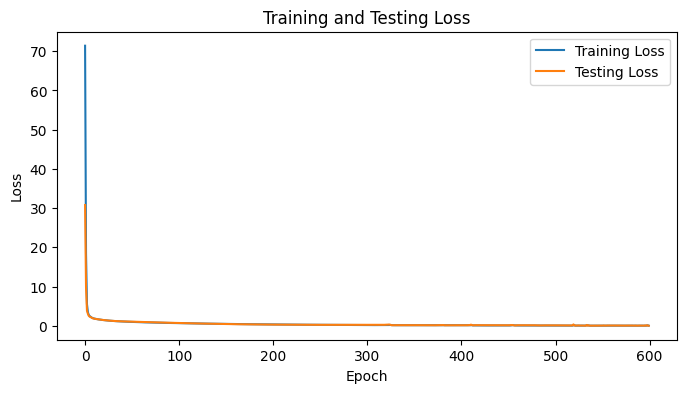

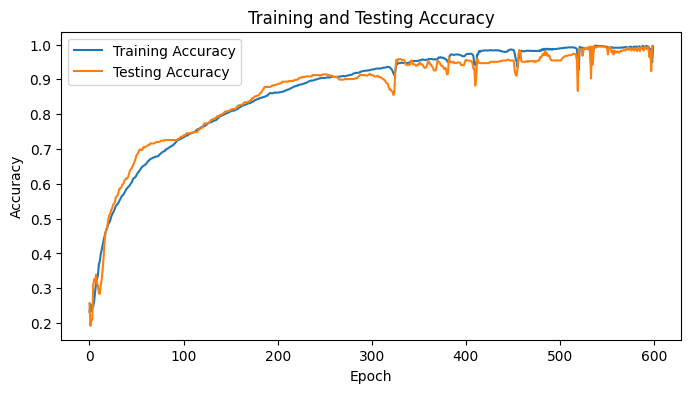

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and testing loss
plt.figure(figsize=(8, 4))
plt.plot(train_loss_hist, label='Training Loss')
plt.plot(test_loss_hist, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('loss_graph.png', transparent=True)  # Save the figure as PNG
plt.show()

# Plotting training and testing accuracy
plt.figure(figsize=(8, 4))
plt.plot(train_acc_hist, label='Training Accuracy')
plt.plot(test_acc_hist, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.savefig('accuracy_graph.png', transparent=True)  # Save the figure as PNG
plt.show()

# ML Models

In [ ]:
# Separate features (X) and target variable (y)
X = df_prep.drop(["NObeyesdad","Weight", "Height", 'Gender', 'family_history_with_overweight', "FAVC",
       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS',  'activity_level', "NObeyesdad_cat"], axis=1)  # Features
y = pd.DataFrame(df_prep["NObeyesdad"]) # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.columns

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'BMR', 'Gender_cat',
       'FHWO_cat', 'FAVC_cat', 'CAEC_cat', 'SMOKE_cat', 'SCC_cat', 'CALC_cat',
       'MTRANS_cat', 'calories_to_maintain_weight'],
      dtype='object')

In [ ]:
X

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,BMR,Gender_cat,FHWO_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat,calories_to_maintain_weight
370,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,3272.176200
371,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2238.857400
379,21.0,2,3,3,3,0,28.734694,1722.198000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2927.736600
444,21.0,2,3,2,1,0,26.892323,1583.079000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,3007.850100
445,21.0,2,3,2,1,0,26.892323,1583.079000,0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2058.002700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227870,28.0,3,3,3,1,1,36.571307,2447.878522,1,1.0,1.0,2.0,0.0,0.0,2.0,3.0,3182.242078
228128,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3133.864974
228129,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,2507.091979
228131,28.0,3,2,1,2,0,35.039689,2089.243316,1,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3551.713637


# Gaussian Naive Bayes classifier

In [ ]:
model = GaussianNB()

model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9662493195427327
0.9593908629441624


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression

In [ ]:

# Create a Logistic Regression model
model_logistic = LogisticRegression(max_iter=12000)

# Fit the model to the training data
model_logistic.fit(X_train, y_train)

# Make predictions using the trained model on the training set
y_pred_train_logistic = model_logistic.predict(X_train)

# Calculate accuracy and confusion matrix on the training set
accuracy_train = accuracy_score(y_train.values, y_pred_train_logistic)
confusion_matrix_train = confusion_matrix(y_train.values, y_pred_train_logistic)

print("Accuracy on training set:", accuracy_train)
print("Confusion Matrix on training set:")
print(confusion_matrix_train)

# Make predictions using the trained model on the test set
y_pred_test_logistic = model_logistic.predict(X_test)

# Calculate accuracy and confusion matrix on the test set
accuracy_test = accuracy_score(y_test.values, y_pred_test_logistic)
confusion_matrix_test = confusion_matrix(y_test.values, y_pred_test_logistic)

print("Accuracy on test set:", accuracy_test)
print("Confusion Matrix on test set:")
print(confusion_matrix_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.9101796407185628
Confusion Matrix on training set:
[[ 68   2   0   0   0   0   0]
 [  7  26   0   0   0  13   5]
 [  0   0 306  15   0   0  20]
 [  0   0   2 341   0   0   0]
 [  0   0   0   0 672   0   0]
 [  0   2   0   0   0 133  30]
 [  0   1  47   0   0  21 126]]
Accuracy on test set: 0.8769035532994924
Confusion Matrix on test set:
[[ 13   0   0   0   0   0   0]
 [  7  10   0   0   0   7   1]
 [  0   0 135  14   0   0   8]
 [  0   0   2 142   0   0   0]
 [  0   0   0   0 285   0   0]
 [  0   2   2   0   0  60  16]
 [  0   0  21   0   0  17  46]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


# Create a Decision Tree model
model_dt = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
model_dt.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model on the training set
y_pred_train_dt = model_dt.predict(X_train)

# Calculate accuracy and confusion matrix on the training set for Decision Tree
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
confusion_matrix_train_dt = confusion_matrix(y_train, y_pred_train_dt)

print("Decision Tree - Accuracy on training set:", accuracy_train_dt)
print("Decision Tree - Confusion Matrix on training set:")
print(confusion_matrix_train_dt)

# Make predictions using the trained Decision Tree model on the test set
y_pred_test_dt = model_dt.predict(X_test)

# Calculate accuracy and confusion matrix on the test set for Decision Tree
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
confusion_matrix_test_dt = confusion_matrix(y_test, y_pred_test_dt)

print("Decision Tree - Accuracy on test set:", accuracy_test_dt)
print("Decision Tree - Confusion Matrix on test set:")
print(confusion_matrix_test_dt)

# Create a Random Forest model
model_rf = RandomForestClassifier()

# Fit the Random Forest model to the training data
model_rf.fit(X_train, y_train)

# Make predictions using the trained Random Forest model on the training set
y_pred_train_rf = model_rf.predict(X_train)

# Calculate accuracy and confusion matrix on the training set for Random Forest
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
confusion_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)

print("Random Forest - Accuracy on training set:", accuracy_train_rf)
print("Random Forest - Confusion Matrix on training set:")
print(confusion_matrix_train_rf)

# Make predictions using the trained Random Forest model on the test set
y_pred_test_rf = model_rf.predict(X_test)

# Calculate accuracy and confusion matrix on the test set for Random Forest
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
confusion_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

print("Random Forest - Accuracy on test set:", accuracy_test_rf)
print("Random Forest - Confusion Matrix on test set:")
print(confusion_matrix_test_rf)


<ipython-input-41-a8a868a83953>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


Decision Tree - Accuracy on training set: 1.0
Decision Tree - Confusion Matrix on training set:
[[ 70   0   0   0   0   0   0]
 [  0  51   0   0   0   0   0]
 [  0   0 341   0   0   0   0]
 [  0   0   0 343   0   0   0]
 [  0   0   0   0 672   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 195]]
Decision Tree - Accuracy on test set: 0.9936548223350253
Decision Tree - Confusion Matrix on test set:
[[ 13   0   0   0   0   0   0]
 [  0  25   0   0   0   0   0]
 [  0   0 154   3   0   0   0]
 [  0   0   2 142   0   0   0]
 [  0   0   0   0 285   0   0]
 [  0   0   0   0   0  80   0]
 [  0   0   0   0   0   0  84]]
Random Forest - Accuracy on training set: 1.0
Random Forest - Confusion Matrix on training set:
[[ 70   0   0   0   0   0   0]
 [  0  51   0   0   0   0   0]
 [  0   0 341   0   0   0   0]
 [  0   0   0 343   0   0   0]
 [  0   0   0   0 672   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 195]]
Random Forest - Accuracy on test set: 0.99619289340

In [ ]:
from sklearn.model_selection import cross_val_score
# Apply k-fold cross-validation on the Decision Tree model
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores and average accuracy
print("Decision Tree - Cross-validation scores:", cv_scores_dt)
print("Decision Tree - Mean accuracy:", cv_scores_dt.mean())

# Create a Random Forest model
model_rf = RandomForestClassifier()

# Apply k-fold cross-validation on the Random Forest model
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores and average accuracy
print("Random Forest - Cross-validation scores:", cv_scores_rf)
print("Random Forest - Mean accuracy:", cv_scores_rf.mean())

Decision Tree - Cross-validation scores: [1.         0.99728261 1.         0.9972752  1.        ]
Decision Tree - Mean accuracy: 0.998911562611065


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest - Cross-validation scores: [1.         1.         1.         1.         0.99455041]
Random Forest - Mean accuracy: 0.9989100817438692


<ipython-input-43-26f8eef474cd>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)
<ipython-input-43-26f8eef474cd>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)
<ipython-input-43-26f8eef474cd>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)
<ipython-input-43-26f8eef474cd>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)
<ipython-input-43-26f8eef474cd>:27: DataConversionWarning: A column-vector y was passed when a 1d array 

Random Forest - Mean Accuracy: 1.0
Random Forest - Standard Deviation Accuracy: 0.0
Random Forest - Mean Confusion Matrix:
[[ 16.6   0.    0.    0.    0.    0.    0. ]
 [  0.   15.2   0.    0.    0.    0.    0. ]
 [  0.    0.   99.6   0.    0.    0.    0. ]
 [  0.    0.    0.   97.4   0.    0.    0. ]
 [  0.    0.    0.    0.  191.4   0.    0. ]
 [  0.    0.    0.    0.    0.   49.    0. ]
 [  0.    0.    0.    0.    0.    0.   55.8]]


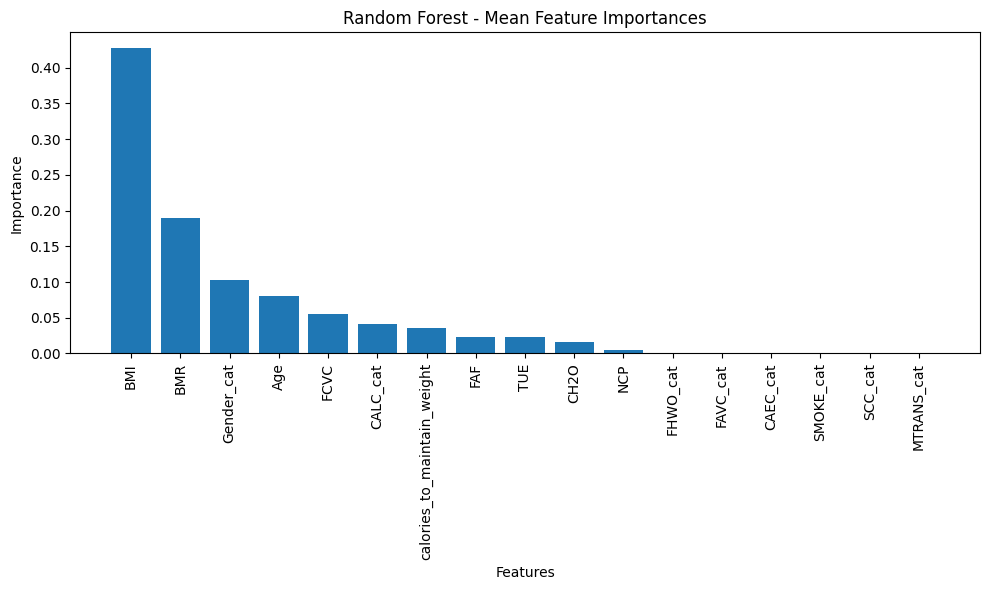

In [ ]:
# Assuming you have the cross-validation code from the previous responses
# and `X_train`, `y_train` contain the training data
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
feature_names = X_train.columns
X_rf = np.array(X)  # Assuming you have already prepared X as the input data
y_rf = np.array(y)  # Assuming y is the target variable

# Create a Random Forest model
model_rf = RandomForestClassifier()

# Arrays to store cross-validation results
accuracy_scores_rf = []
confusion_matrices_rf = []
feature_importances_rf_list = []  # List to store feature importances for each fold

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X_rf[train_index], X_rf[test_index]
    y_train, y_test = y_rf[train_index], y_rf[test_index]

    # Create a new Random Forest model for each fold
    model_rf = RandomForestClassifier()

    # Fit the Random Forest model to the training data for this fold
    model_rf.fit(X_train, y_train)

    # Make predictions using the trained Random Forest model on the test set
    y_pred_test_rf = model_rf.predict(X_test)

    # Calculate accuracy and confusion matrix on the test set for Random Forest
    accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
    confusion_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

    # Get feature importances for this fold and store them in the list
    feature_importances_rf_list.append(model_rf.feature_importances_)

    # Store the results for this fold
    accuracy_scores_rf.append(accuracy_rf)
    confusion_matrices_rf.append(confusion_matrix_rf)

# Calculate mean and standard deviation of cross-validation results for Random Forest
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_confusion_matrix_rf = np.mean(confusion_matrices_rf, axis=0)

print("Random Forest - Mean Accuracy:", mean_accuracy_rf)
print("Random Forest - Standard Deviation Accuracy:", std_accuracy_rf)
print("Random Forest - Mean Confusion Matrix:")
print(mean_confusion_matrix_rf)

# Convert the list of feature importances to a DataFrame
feature_importance_rf_df = pd.DataFrame(feature_importances_rf_list, columns=feature_names)

# Calculate mean feature importances across folds
mean_feature_importances_rf = feature_importance_rf_df.mean()

# Sort feature importances in descending order
mean_feature_importances_rf = mean_feature_importances_rf.sort_values(ascending=False)

# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(mean_feature_importances_rf.index, mean_feature_importances_rf.values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest - Mean Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('importance', transparent=True)
plt.show()



In [ ]:
# from sklearn.model_selection import StratifiedKFold
# # Assuming you have the cross-validation code from the previous responses
# # and `X_train`, `y_train` contain the training data
# num_folds = 5
# kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
# feature_names = X_train.columns
# X_dt = np.array(X_train)
# y_dt = np.array(y_train)

# # Create a Decision Tree model
# model_dt = DecisionTreeClassifier()

# # Arrays to store cross-validation results
# accuracy_scores_dt = []
# confusion_matrices_dt = []
# feature_importances_dt_list = []

# # Perform k-fold cross-validation
# for train_index, test_index in kfold.split(X, y):
#     X_train, X_test = X_dt[train_index], X_dt[test_index]
#     y_train, y_test = y_dt[train_index], y_dt[test_index]

#     # Fit the Decision Tree model
#     model_dt.fit(X_train, y_train)

#     # Make predictions
#     y_pred_test_dt = model_dt.predict(X_test)

#     # Evaluate accuracy and confusion matrix
#     accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
#     confusion_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)

#     # Get feature importances
#     feature_importances_dt_list.append(model_dt.feature_importances_)

#     # Store results
#     accuracy_scores_dt.append(accuracy_dt)
#     confusion_matrices_dt.append(confusion_matrix_dt)

# # Calculate metrics
# mean_accuracy_dt = np.mean(accuracy_scores_dt)
# std_accuracy_dt = np.std(accuracy_scores_dt)
# mean_confusion_matrix_dt = np.mean(confusion_matrices_dt, axis=0)

# # Print metrics
# print("Decision Tree - Mean Accuracy:", mean_accuracy_dt)
# print("Decision Tree - Std Dev Accuracy:", std_accuracy_dt)
# print("Decision Tree - Mean Confusion Matrix:")
# print(mean_confusion_matrix_dt)

# # Get average feature importances
# feature_importances_dt_df = pd.DataFrame(feature_importances_dt_list, columns=feature_names)
# mean_feature_importances_dt = feature_importances_dt_df.mean()
# mean_feature_importances_dt.sort_values(ascending=False, inplace=True)

# # Plot feature importances
# plt.figure()
# plt.bar(mean_feature_importances_dt.index, mean_feature_importances_dt.values)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Decision Tree - Mean Feature Importances')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

# Prediction Functions

In [ ]:
def calc_BMR(weight , height , age , gender):
  if gender == 'Female':
    return 655.1 + (9.563 * weight ) + (1.85 * height ) - (4.676 * age )
  elif  gender == 'Male':
    return  66.47 + (13.75 * weight ) + (5.003 * height ) - (6.755 * age )

In [ ]:
def calc_BMI(weight, height):
    bmi = weight / (height ** 2)
    return bmi

In [ ]:
def calc_cal_to_main(activity_level , weight , height , age, gender):
  BMR = calc_BMR(weight , height , age , gender)
  if activity_level == 'Sedentary Activity Level':
    activity_level = 1.2
  elif activity_level == 'Slightly Activity Level':
    activity_level = 1.3
  elif activity_level == 'Moderately Activity Level':
    activity_level = 1.5
  elif activity_level == 'Very Activity Level':
    activity_level = 1.7
  elif activity_level == 'Extra Activity Level':
    activity_level = 1.9

  return BMR * activity_level

In [ ]:
def rename (gender,df):
  if gender == "Female":
    df['Gender']= 'F'
  elif gender =='Male':
    df['Gender']='M'
  return df

In [ ]:
def obestype(model, input_data):

    df_input = pd.DataFrame(input_data, index=[0])

    if df_input.loc[0, 'Gender'] == 'Female':
        df_input.loc[0, 'BMR'] = calc_BMR(df_input.loc[0, 'Weight'], df_input.loc[0, 'Height'], df_input.loc[0, 'Age'], 'Female')
    elif df_input.loc[0, 'Gender'] == 'Male':
        df_input.loc[0, 'BMR'] = calc_BMR(df_input.loc[0, 'Weight'], df_input.loc[0, 'Height'], df_input.loc[0, 'Age'], 'Male')

    df_input.loc[0, 'BMI'] = calc_BMI(df_input.loc[0, 'Weight'], df_input.loc[0, 'Height'])

    if df_input.loc[0, 'activity_level'] == 'Sedentary Activity Level':
        df_input.loc[0, 'activity_level'] = 1.2
    elif df_input.loc[0, 'activity_level'] == 'Slightly Activity Level':
        df_input.loc[0, 'activity_level'] = 1.3
    elif df_input.loc[0, 'activity_level'] == 'Moderately Activity Level':
        df_input.loc[0, 'activity_level'] = 1.5
    elif df_input.loc[0, 'activity_level'] == 'Very Activity Level':
        df_input.loc[0, 'activity_level'] = 1.7
    elif df_input.loc[0, 'activity_level'] == 'Extra Activity Level':
        df_input.loc[0, 'activity_level'] = 1.9

    df_input.loc[0, 'calories_to_maintain_weight'] = df_input.loc[0, 'activity_level'] * df_input.loc[0, 'BMR']

    name_mapping = {"Female": 'F', "Male": "M"}
    df_input["Gender"] = df_input["Gender"].map(name_mapping)
    df_input['Age'] = df_input['Age'].astype(int)

    name_mapping = {"Never": 1, "Sometimes": 2, "Always": 3}
    df_input["FCVC"] = df_input["FCVC"].map(name_mapping)

    name_mapping = {"Less than a liter": 1, "Between 1 and 2 L": 2, "More than 2 L": 3}
    df_input["CH2O"] = df_input["CH2O"].map(name_mapping)

    name_mapping = {"Between 1 y 2": 2, "Three": 3, "More than three": 4}
    df_input["NCP"] = df_input["NCP"].map(name_mapping)

    name_mapping = {"I do not have": 0, "1 or 2 days": 1, "2 or 4 days": 2, "4 or 5 days": 3}
    df_input["FAF"] = df_input["FAF"].map(name_mapping)

    name_mapping = {"0–2 hours": 0, "3–5 hours": 1, "More than 5 hours": 2}
    df_input["TUE"] = df_input["TUE"].map(name_mapping)

    df_prep = df_input.copy()
    df_prep = pd.get_dummies(df_prep, columns=["Gender", "family_history_with_overweight",
                                               "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"])


    feature_order = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI',
       'BMR', 'Gender_cat', 'FHWO_cat', 'FAVC_cat', 'CAEC_cat', 'SMOKE_cat',
       'SCC_cat', 'CALC_cat', 'MTRANS_cat',
       'calories_to_maintain_weight' ]
    # feature_order = ['Age','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI',
    #    'BMR', 'activity_level', 'calories_to_maintain_weight', 'Gender_F',
    #    'Gender_M', 'family_history_with_overweight_no',
    #    'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
    #    'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
    #    'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
    #    'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
    #    'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
    #    'MTRANS_Walking']

    df_prep = df_prep.reindex(columns=feature_order)
    df_prep.fillna(0,inplace=True)
    # print(df_prep)
    pred = model.predict(df_prep)

    return pred

In [ ]:
input_values = {
    'Gender':'Female',
    'Age': 40,
    'Height': 1.6,
    'Weight': 90,
    'family_history_with_overweight':'yes',
    'FAVC':"yes",
    'FCVC': 'Never',
    'NCP': 'Between 1 y 2',
    'CH2O': 'Between 1 and 2 L',
    'FAF': "I do not have",
    'TUE': '0–2 hours',
    'SMOKE':'yes',
    'MTRANS':'Bike',
    'SCC':'yes',
    'CALC':'Always',
    'activity_level':'Moderately Activity Level',
    'CAEC':'Always'
}

result = obestype(model_rf, input_values)
print(result)

['Obesity_Type_III']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
from numpy import ceil
import re
import itertools
import random

df_BF = pd.read_csv("https://raw.githubusercontent.com/SaraElsaggan/nile_project/main/breakfast.csv" ,  encoding='latin1')
df_L = pd.read_csv("https://raw.githubusercontent.com/SaraElsaggan/nile_project/main/meals.csv" ,  encoding='latin1')
df_D = pd.read_csv("https://raw.githubusercontent.com/SaraElsaggan/nile_project/main/dinner.csv" ,  encoding='latin1')

for column in df_BF.columns:
    df_BF[column] = df_BF[column].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', str(x)).strip())

for column in df_L.columns:
    df_L[column] = df_L[column].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', str(x)).strip())

for column in df_D.columns:
    df_D[column] = df_D[column].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', str(x)).strip())


df_BF.drop(columns= ["Fat(g)" , "Carbs(g)" , 'Prot(g)' ], axis = 1, inplace = True)
df_BF['Calories'] = df_BF['Calories'].astype(int)


df_L['Calories'] = df_L['Calories'].str.replace('cal', '').astype(int)
food_and_serving = df_L['Food'] + df_L['Serving']
df_L.insert(0,'food and serving' ,  food_and_serving)
df_L.drop(columns=['Food' , 'Serving']  , axis = 1, inplace = True)


df_D = df_D[['Food and Serving' , 'Calories' ]]
df_D['Calories'] = pd.to_numeric(df_D['Calories'], errors='coerce')
df_D = df_D.drop(0)
df_D['Calories'] = df_D['Calories'].astype(int)

In [ ]:
df7 = pd.read_csv('https://raw.githubusercontent.com/SaraElsaggan/nile_project/main/Exercise.csv')
df7.drop(columns= ["Date","Steps" ], axis = 1, inplace = True)
df7['Exercise Calories'] = df7['Exercise Calories'].astype(int)
df7.shape

duplicate_rows = df7.duplicated()

num_duplicate_rows = duplicate_rows.sum()


if num_duplicate_rows > 0:
    print("Duplicate Rows:")
else:
    print("No duplicate rows found.")
df7 = df7.drop_duplicates()
df7

Duplicate Rows:


,Exercise,Exercise Calories,Exercise Minutes
0,"Walking, upstairs",59,5
1,"Walking, 3.5 mph, uphill",52,6
2,Kickboxing (including Turbo Jam),150,10
3,"Calisthenics (pushups, sit-ups), vigorous effort",117,10
5,"Running (jogging), 5 mph (12 min mile)",117,10
...,...,...,...
98,Elliptical,399,35
99,"Hiking, climbing hills (carrying <10 lb load)",475,45
100,"Hiking, cross country",402,45
101,Elliptical,513,45


In [ ]:
def calc_ideal_weight(height , gender ):
  if gender == "Female":
    ideal_weight =  45.5 + 0.91 * (height - 152.4)
  elif gender == 'Male':
    ideal_weight = 50 + 0.91 * (height - 152.4)
  return ideal_weight


def BMI_calc(weight, height):
    bmi = weight / (height ** 2)
    return bmi


def calc_BMR(weight , height , age , gender):
  if gender == 'Female':
    return 655.1 + (9.563 * weight ) + (1.85 * height ) - (4.676 * age )
  elif  gender == 'Male':
    return  66.47 + (13.75 * weight ) + (5.003 * height ) - (6.755 * age )


def req_cal_to_gain(curr_weight, target_weight , gender,  height):
    try:
        weeks = (curr_weight - target_weight) / .5

        cal = (target_weight - curr_weight ) * (1100 / weeks)
    except ZeroDivisionError:
        raise ZeroDivisionError("Number of weeks should not be zero.")
    return cal




def calc_cal_to_main(activity_level , weight , height , age, gender):
  BMR = calc_BMR(weight , height , age , gender)
  if activity_level == 'Sedentary Activity Level':
    activity_level = 1.2
  elif activity_level == 'Slightly Activity Level':
    activity_level = 1.3
  elif activity_level == 'Moderately Activity Level':
    activity_level = 1.5
  elif activity_level == 'Very Activity Level':
    activity_level = 1.7
  elif activity_level == 'Extra Activity Level':
    activity_level = 1.9

  return BMR * activity_level

In [ ]:
def reco_meal(df, target_cals, combinations_num =1):
    combinations = []
    df_shuffled = df.sample(frac=1)

    meals = df_shuffled.iloc[:, 0].tolist()
    calories = df_shuffled.iloc[:, 1].tolist()

    for r in range(len(calories)):
        for subset in itertools.combinations(zip(calories, meals), r):
            current_sum = sum([cal for cal, _ in subset])
            if current_sum==target_cals  :

                combinations.append(subset)

        if len(combinations) >= combinations_num :
            break

    return combinations[:combinations_num ]

In [ ]:
calc_ideal_weight(166 , 'Female')

57.876

In [ ]:
#فانشكن تمارين
def reco_exer (df, target_burn_calories , combinations_num = 1):
  combinations = []
  df_shuffled = df.sample(frac=1)

  Exercise = df_shuffled['Exercise'].tolist()
  Calories = df_shuffled['Exercise Calories'].tolist()
  minutes = df_shuffled['Exercise Minutes'].tolist()

  for r in range(len(Calories)):
          for subset in itertools.combinations(zip(Exercise, Calories , ), r):
              current_sum = sum([cal for _, cal in subset])
              if current_sum==target_burn_calories  :
                  combinations.append(subset)
                  if len(combinations) >= combinations_num :
                      break

          if len(combinations) >= combinations_num :
              break
  return combinations[:combinations_num ]


In [ ]:
def recomend (obesity_level , height  , weight   , gender , activity_level , age  ):
  ideal_weight = calc_ideal_weight(height , gender)
  cals_to_main =  calc_cal_to_main(activity_level , weight , height , age , gender  )
  weeks = (weight - ideal_weight) / .5
  # weeks = int(input("enter the number of weeks to reach the target weight"))

  req_to_gain = req_cal_to_gain(weight  , weeks , gender , height)
  req_to_lose = -req_cal_to_gain(weight  , weeks , gender , height)
  daily_cal_to_gain = cals_to_main + req_to_gain
  daily_cal_to_lose = cals_to_main - req_to_lose

  if obesity_level == "Insufficient_Weight":
    cals = daily_cal_to_gain
    print(f"Your weight is Insufficient_Weight, so to reach your ideal weight which is {ideal_weight},\n"
          f"you can increase your daily calories by {req_to_gain}.\n"
          f"So the daily calories needed will be {daily_cal_to_gain}.\n"
          f"And here is a meal recommendation that satisfies the daily calories needed for {weeks} week.")

  elif obesity_level == "Normal_Weight":
    cals = cals_to_main

    print(f"Your weight is normal and no need to change your weight.\n"
          f"To maintain your weight, you will need to have {cals_to_main}.\n"
          f"And here is a meal recommendation that satisfies the daily calories needed.")

  elif obesity_level == 'Overweight_Level_II' or obesity_level == 'Overweight_Level_I':
    cals = daily_cal_to_lose
    print(f"Your weight is overweight, so to reach your ideal weight which is {ideal_weight},\n"
          f"you can decrease your daily calories by {req_to_lose}.\n"
          f"So the daily calories needed will be {daily_cal_to_lose}.\n"
          f"And here is a meal recommendation that satisfies the daily calories needed for {weeks} week,\n"
          f"or you can do these exercises.")




  exee = reco_exer(df7 , ceil(req_to_lose) )
  meals_BF = reco_meal(df_BF , ceil(cals * .375)  )
  meals_L = reco_meal(df_L , ceil(cals * 0.375)  )
  meals_D = reco_meal(df_BF , ceil(cals/4)  )
  return meals_BF , meals_L , meals_D , exee

# BF , L , D , ex  = recomend(obestype , 165 , 70 , "Female"  , 'Moderately Activity Level' , 23)
BF , L , D , ex  = recomend(result , 165 , 70 , "Female"  , 'Moderately Activity Level' , 23)

print("meals : ")
print(BF)
print(L)
print(D)


print("exersises")
print(ex)


Your weight is overweight, so to reach your ideal weight which is 56.965999999999994,
you can decrease your daily calories by 550.0.
So the daily calories needed will be 1733.3180000000002.
And here is a meal recommendation that satisfies the daily calories needed for 26.068000000000012 week,
or you can do these exercises.
meals : 
[((461, 'Sausage Biscuit'), (189, 'English Muffin with Butter'))]
[((300, 'Philly Cheese Steak1 sandwich (120 g)'), (350, 'Spring Roll1 roll (140 g)'))]
[((357, 'Bacon on Biscuit'), (77, 'Hard Boiled Egg'))]
exersises
[(('Running (jogging), 5.2 mph (11.5 min mile)', 257), ('Walking, 3.5 mph, uphill', 133), ('Calisthenics (pushups, sit-ups), vigorous effort', 160))]
